## Collaborators and Author of these notebook

Gerald Mwangi

Ian Kiptoo

Lynn Komen



## BUSINESS UNDERSTANDING

### BUSINESS OVERVIEW:



Brand and Product Emotions refer to the feelings and attitudes that consumers express towards specific brands and their products. These emotions, which can be positive, negative, or neutral, are influenced by factors such as personal experiences, marketing efforts, product quality, and social trends. . We can offer useful insights for enhancing customer satisfaction and brand reputation by categorising the emotions conveyed in tweets and identifying the targeted brands or items.
Social media sentiment has a big influence on how consumers perceive brands and behave. Negative attitudes can cause reputational harm and consumer attrition, while positive sentiments can increase brand loyalty and draw in new clients. As a result, it is critical for Codel Electronics Company marketing department to track and evaluate public opinion in order to proactively fix problems and capitalise on favourable comments for advertising.


### Stakeholder
Codel Electronics brand Manager who is responsible for overseeing the brand's image and reputation, ensuring it aligns with the company's values and market goals


###  PROBLEM STATEMENT

Codel Electronics Company lacks comprehensive insights into consumer emotions and public opinion towards its products and brands. This hinders their ability to identify areas for improvement, enhance customer satisfaction, and develop effective market strategies. A systematic approach to analyzing Twitter sentiment is needed to gain actionable insights and stay competitive.

###  PROPOSED SOLUTION

Analyzing Twitter sentiment to understand consumer emotions towards Apple and Google products, identify areas for improvement, and enhance market strategies to comprehend public opinion about products and brands offered by Codel Electronics Company.

### OBJECTIVES:

MAIN OBJECTIVE

To develop predictive models to classify the sentiment (positive, negative, or neutral) expressed in tweets about  Apple and google brand and products.

SPECIFIC OBJECTIVES



To identify the best-performing product, in terms of positive and negative

To understand sentiment (emotion) distribution regarding Apple and Google brand

To provide actionable insights from analyzing Twitter sentiments


### SUCCESS CRITERIA

Goal: Creating a multiclass machine learning mode with an accuracy of more than 75% and a f1_score of more than 70%

### CONSTRAINTS


- High computational needs required when tuning and optimizing our models
- Quality of data - Target variable class imbalance

# Data Understanding

The dataset comes from CrowdFlower via data.world [Source](https://data.world/crowdflower/brands-and-product-emotions), It contain  3 columns with over 9000 tweets of people  sentiments about google and apple products on twitter which were classified as either positive, negative, no emotions or .i can't tell


### Features(columns)
1. **Tweet_text (Categorical)**: The text of the tweet. This feature contains the actual tweet content posted by users ,it's also our predictor variable
2. **Emotion_in_tweet_is_directed_at (Categorical)**: The brand or product that the emotion in the tweet is directed at. This feature identifies which brand or product is the target of the emotion expressed in the tweet.
3. **Is_there_an_emotion_directed_at_a_brand_or_product (Categorical)**: Indicates whether there is an emotion directed at a brand or product. The possible values include "Positive emotion", "Negative emotion", and "No emotion toward brand or product", its also our target variable

In [61]:
# Import necessary modules

# data manupulation
import numpy as np
import pandas as pd
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# text cleaning
import string
import re
# nlp preprosessing
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
from nltk.probability import FreqDist
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer, TweetTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
# modelling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, label_binarize
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.linear_model import LogisticRegression
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from sklearn.ensemble import GradientBoostingClassifier
#from keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,recall_score,f1_score
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize

import joblib
import warnings

warnings.filterwarnings("ignore")

In [62]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Let's load our data and explore more to understand it better

In [63]:
# Read data

def read_data(file_path):
    """Read the dataset from the given filepath.
    Parameters:
        - file_path (str): The path to the csv file containing the dataset.
    Returns:
        - DataFrame: The DataFrame containing the dataset.
    """
    # Specify the encoding
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        # If utf-8 fails, try 'latin1' encoding
        df = pd.read_csv(file_path, encoding='latin1')

    return df

# Specify the file_path
file_path = "judge-1377884607_tweet_product_company.csv"
df = read_data(file_path)

In [64]:
# Explore the Data and get familiar with all the variables
#Creating a DataUnderstandingclass to help us explore our dataset further
class DataUnderstanding:
    def __init__(self, data):
        self.data = data

    def data_info(self, n=5):  
        print("DataFrame Information:")
        print(self.data.info())
        print(f"Columns:\n{self.data.columns.tolist()}")
        print(f"Data Types for each column:\n{self.data.dtypes}")
        print(f"The first {n} rows:\n{self.data.head(n)}")  


#intializing the class
data_summary = DataUnderstanding(df)

# Calling the data_info method
data_summary.data_info()      

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None
Columns:
['tweet_text', 'emotion_in_tweet_is_directed_at', 'is_there_an_emotion_directed_at_a_brand_or_product']
Data Types for each column:
tweet_text                                            object
emotion_in_tweet_is_directed_at                       object
is_there_an_emotion_directed_at_a_brand_or_product    object
dtype: object
The first 5 rows:
                                          tweet_text  \
0  .@wesley8

# Data Importation and Inspection

### First 5 Rows:
The dataset comprises tweets about multiple brands and products, along with emotions directed towards them.

### Basic Data Information:
The dataset has 3 columns:
1. `tweet_text`: Contains the text of the tweet.
2. `emotion_in_tweet_is_directed_at`: Indicates the brand or product the emotion is directed at.
3. `is_there_an_emotion_directed_at_a_brand_or_product`: Specifies whether there is a positive, negative, or no emotion directed at the brand or product.

- The dataset has a total of 9093 entries.
- The `tweet_text` column has 9092 non-null values.
- The `emotion_in_tweet_is_directed_at` column has 3291 non-null values.
- The `is_there_an_emotion_directed_at_a_brand_or_product` column has 9093 non-null values.

### Data Shape:
The dataset consists of 9093 rows and 3 columns, indicating there are 9093 observations and 3 features.

### Data Types:
- All three columns (`tweet_text`, `emotion_in_tweet_is_directed_at`, and `is_there_an_emotion_directed_at_a_brand_or_product`) are of object type, indicating they contain categorical or text data.

### Summary Statistics:
The summary statistics provide insights into the distribution of data in the dataset.

- **tweet_text**:
  - **Count:** 9092 (total observations)
  - **Unique:** 9065 (unique tweets)
  - **Top:** "RT @mention Marissa Mayer: Google Will Connect You With The Future!" (most frequent tweet)
  - **Frequency:** 5 (occurrences of the most frequent tweet)

- **emotion_in_tweet_is_directed_at**:
  - **Count:** 3291 (non-null observations)
  - **Unique:** 9 (unique brands/products)
  - **Top:** "iPad" (most frequent brand/product)
  - **Frequency:** 946 (occurrences of the most frequent brand/product)

- **is_there_an_emotion_directed_at_a_brand_or_product**:
  - **Count:** 9093 (total observations)
  - **Unique:** 4 (unique sentiment categories)
  - **Top:** "No emotion toward brand or product" (most frequent sentiment)
  - **Frequency:** 5389 (occurrences of the most frequent sentiment)

These statistics are useful for understanding the data distribution and identifying any potential inconsistencies or areas for further investigation. The dataset provides a solid foundation for analyzing public sentiment towards brands and products based on Twitter data.


## Data Preparation

### Data Cleaning

**Steps to be followed**
1. **Completeness** - check at missing values and handle them
2. **Consistency**  - check for duplicate values
2. **Uniformity** - we will rename our columnsas well us cleaning our texts by removing punctuations capital letters as well as    hash tags
3. **Tokenizing** -Tokenize our tweets
4. **Removing of stop words**
5. **Normalization** - through lemmatization

In [65]:
#checking at the  tweet_text column
tweet = df['tweet_text']
tweet.head()

0    .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1    @jessedee Know about @fludapp ? Awesome iPad/i...
2    @swonderlin Can not wait for #iPad 2 also. The...
3    @sxsw I hope this year's festival isn't as cra...
4    @sxtxstate great stuff on Fri #SXSW: Marissa M...
Name: tweet_text, dtype: object

In [66]:
#lets create a class data cleaniing

class DataCleaning:
    def __init__(self, df):
        self.df = df

    def missing_values(self): # checkin for percentage of mising values in each column
        missing_values = self.df.isnull().sum()
        missing_percentage = (self.df.isnull().mean() * 100)
        return missing_percentage

    def change_col_name(self): # changing column names for uniformity
        self.df = self.df.rename({'tweet_text': 'tweet',
                              'emotion_in_tweet_is_directed_at': 'product',
                              'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'},
                             axis=1)
        return self.df
    @staticmethod
    def clean_tweet(tweet): #removing punctuations ,uppercase , white spaces and @
        if isinstance(tweet, str):
            tweet = tweet.lower()
            tweet = re.sub(r'[^\w\s]', '', tweet)
            tweet = re.sub(r'\s+', ' ', tweet).strip()
            tweet = re.sub(r'@\w+', '', tweet)
        return tweet

    def check_duplicates(self):
        duplicates = self.df.duplicated().sum()
        return print(f"Number of duplicate rows: {duplicates}")



**Competeness**

In [67]:
# instatiating the datacleaning class and callng its method
clean_df = DataCleaning(df)
missing_percentages = clean_df.missing_values()
missing_percentages

tweet_text                                             0.010997
emotion_in_tweet_is_directed_at                       63.807324
is_there_an_emotion_directed_at_a_brand_or_product     0.000000
dtype: float64

We have a insignificant null values in the 'tweet_text' column which would not affect our dataset so we will drop the null value ,we also have a large percentage of null values in the 'emotion_in_tweet_is_directed_at' column which does not affect us much since we will not be using the column for modelling purpose as well as analysis

In [68]:
df.dropna(subset=['tweet_text'], inplace=True)
df.shape

(9092, 3)


Null values in 'tweet_text' dropped



**Consistency**

In [69]:
#Caling the check_duplicate method from our datacleaning class
duplicate = clean_df.check_duplicates()

Number of duplicate rows: 22


We have 22 duplicates lets investigate them further



In [70]:
def print_duplicate_values_and_columns(dataframe):
    for col in df.columns:
      duplicates = df[df.duplicated(subset=[col], keep=False)][col]
      if not duplicates.empty:
          print(f"Column: {col}")
          print(duplicates.value_counts())
          print()


duplicate = print_duplicate_values_and_columns(df)

duplicate





Column: tweet_text
tweet_text
RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw                                      5
RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #SXSW                                      4
RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw                                                   4
RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #SXSW                                                   3
#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan          2
Win free iPad 2 from webdoc.com #sxsw RT                                                                                                            2
RT @mention RT @mention Google to Launch Major New Social Network Call

The duplicates appear to be caused by the hash tags and repetion of tweets hence we will drop them

In [71]:
#dropping the duplicate values
df.drop_duplicates()
#confirming duplicates dropped
df.shape

(9092, 3)

Duplicates dropped

**Uniformity**

In [72]:
# # changing columns names by calling the class method
df = clean_df.change_col_name()
df

,tweet,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


We have successfully changed the column names into tweet,product and emotion for easy interpration

In [73]:
#Changing the emotion value no emotions into neutral
df['emotion'] = df['emotion'].replace({'No emotion toward brand or product':
                         'Neutral emotion'})

Changing the 'no emotions towards brand or product' value to 'neutral emotion' help us to better interprate the  emotion classes and uniformity in our dataset.We won't rename the 'i can't tell' emotion because it has the least number of records and won't be significant in our analysis

In [74]:
# doing text cleaning  by removing @, punctuation ,uppercase by hep of our class method
df['cleaned_tweet'] = df['tweet'].apply(DataCleaning.clean_tweet)
df['cleaned_tweet'].head()

0    wesley83 i have a 3g iphone after 3 hrs tweeti...
1    jessedee know about fludapp awesome ipadiphone...
2    swonderlin can not wait for ipad 2 also they s...
3    sxsw i hope this years festival isnt as crashy...
4    sxtxstate great stuff on fri sxsw marissa maye...
Name: cleaned_tweet, dtype: object

We have removed punctuations, capital letters ,numbers, white spaces,hashtags and @ symbols hence making our tweets ready for processing

**Tokenization**

In [75]:
#lets create a function to tokenize our cleaned_tweet
def tokenize_text(cleaned_tweet):
    return word_tokenize(cleaned_tweet)

# Applying the tokenize_tweet function
df['tokenized_tweet'] = df['cleaned_tweet'].apply(word_tokenize)
df.head()

,tweet,product,emotion,cleaned_tweet,tokenized_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after 3 hrs tweeti...,"[wesley83, i, have, a, 3g, iphone, after, 3, h..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipadiphone...,"[jessedee, know, about, fludapp, awesome, ipad..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for ipad 2 also they s...,"[swonderlin, can, not, wait, for, ipad, 2, als..."
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this years festival isnt as crashy...,"[sxsw, i, hope, this, years, festival, isnt, a..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa maye...,"[sxtxstate, great, stuff, on, fri, sxsw, maris..."


We have successfully tokenized our cleaned_tweets these will enable the machine to process our texts data

**Removing of stopwords**

In [76]:
# instastiating the stopwords as well as creating and applying a function to remove stop words

sw = set(stopwords.words('english'))
#removing stop words and adding more stops words to our list
def remove_stopwords(tokenized_tweet):
    sw.update([
        'sxsw', 'mention', 'link', 'rt', 'app', 'android', 'sxswi', 'party', 'mobile', 'apps',
        'downtown', 'maps', 'check', 'mayer', 'marissa', 'googles', 'us', 'pop', 'news',
        'win', 'first', 'launch', 'panel', 'shop', 'booth', 'apples', 'itunes', 'ipads',
        'blackberry', 'temp', 'designing', 'tv', 'fb', 'quotgoogle', 'uberguide', 'ubersocial',
        'gsdm', 'interactive', 'flipboard', 'tapworthy', 'sampler', 'navigation', 'quotthe',
        'qagb', 'foursquare', 'wifi', 'hootsuite', 'checkins'
    ])
    return [i for i in tokenized_tweet if i not in sw]

df['removed_stop_tweet'] = df['tokenized_tweet'].apply(remove_stopwords)
df.head()


,tweet,product,emotion,cleaned_tweet,tokenized_tweet,removed_stop_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after 3 hrs tweeti...,"[wesley83, i, have, a, 3g, iphone, after, 3, h...","[wesley83, 3g, iphone, 3, hrs, tweeting, rise_..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipadiphone...,"[jessedee, know, about, fludapp, awesome, ipad...","[jessedee, know, fludapp, awesome, ipadiphone,..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for ipad 2 also they s...,"[swonderlin, can, not, wait, for, ipad, 2, als...","[swonderlin, wait, ipad, 2, also, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this years festival isnt as crashy...,"[sxsw, i, hope, this, years, festival, isnt, a...","[hope, years, festival, isnt, crashy, years, i..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa maye...,"[sxtxstate, great, stuff, on, fri, sxsw, maris...","[sxtxstate, great, stuff, fri, google, tim, or..."


Removing of stopwords help to shorten our texts for easy processing and modelling as well as removing irrelevant words which will affect our modelling

**Normalization**

We will be normalizing with lemmatization so as to  reduce the tweet words to there root form, when retaining most of the information and meaning

In [77]:
new_df = df.copy()

#lets lemmetize
lemmatizer = WordNetLemmatizer()

def lemmatize_text(removed_stop_tweet) :
    return [lemmatizer.lemmatize(word) for word in removed_stop_tweet ]

new_df['lemmatized_tweet'] = new_df['removed_stop_tweet'].apply(lemmatize_text)
new_df.head()



,tweet,product,emotion,cleaned_tweet,tokenized_tweet,removed_stop_tweet,lemmatized_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after 3 hrs tweeti...,"[wesley83, i, have, a, 3g, iphone, after, 3, h...","[wesley83, 3g, iphone, 3, hrs, tweeting, rise_...","[wesley83, 3g, iphone, 3, hr, tweeting, rise_a..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipadiphone...,"[jessedee, know, about, fludapp, awesome, ipad...","[jessedee, know, fludapp, awesome, ipadiphone,...","[jessedee, know, fludapp, awesome, ipadiphone,..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for ipad 2 also they s...,"[swonderlin, can, not, wait, for, ipad, 2, als...","[swonderlin, wait, ipad, 2, also, sale]","[swonderlin, wait, ipad, 2, also, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this years festival isnt as crashy...,"[sxsw, i, hope, this, years, festival, isnt, a...","[hope, years, festival, isnt, crashy, years, i...","[hope, year, festival, isnt, crashy, year, iph..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa maye...,"[sxtxstate, great, stuff, on, fri, sxsw, maris...","[sxtxstate, great, stuff, fri, google, tim, or...","[sxtxstate, great, stuff, fri, google, tim, or..."


In [78]:
#joinging the lemmatized tweets
new_df['lemmatized_tweet'] = new_df['lemmatized_tweet'].apply(lambda x: ' '.join(x))



we join them back to aid us in prepossessing and further analysis

### Feature engineering

We will add a company_name column which enable us to view the different products mention in the tweets either there from apple or google

In [79]:
#fuction to separate Apple and Google products
def get_company(row):
    list = ['iPad','Apple','iPad or iPhone App','iPhone','Other Apple product or service']
    if row['product'] is np.nan:
        return np.nan
    if row['product'] in list:
        return 'Apple'
    else:
        return 'Google'

In [80]:
#creating the new column
new_df['company_name'] = df.apply(get_company, axis = 1)

new_df['company_name'].value_counts()

company_name
Apple     2409
Google     882
Name: count, dtype: int64

**Saving the clean dataset to a csv file**

## EDA and Visualization

### Univalent analysis

In [81]:
#lets check the distribution of our target variable emotion
df = new_df
df['emotion'].value_counts()

emotion
Neutral emotion     5388
Positive emotion    2978
Negative emotion     570
I can't tell         156
Name: count, dtype: int64

#### A barplot of distribution of 'emotion' (target variable)

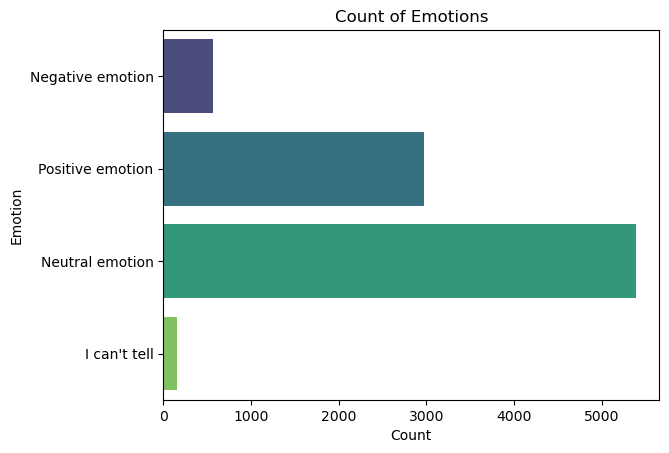

In [82]:
# Visualizing the emotion column
sns.countplot(y='emotion', data=df, palette='viridis')
plt.title('Count of Emotions')
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.show()

**Observation**

The most frequently occurring emotion is Neutral emotion, with a count of more than 5000, followed by positive emotion with more than 2500 counts. Negative emotions with more than 500 counts and finally I can't tell with below 200 counts.

There is a noticeable disparity between the counts of No emotion toward brand or product (5338) and the other emotions, with Positive emotion being the next most frequent at 2527, and Negative emotion at 570.

The high frequency of No emotion toward a brand or product might be attributed to users sharing informational or factual content about the products rather than personal opinions or emotional responses.

A huge class imbalance between the classes



#### A histogram visualizing the  distribution of lemmatized_tweet column

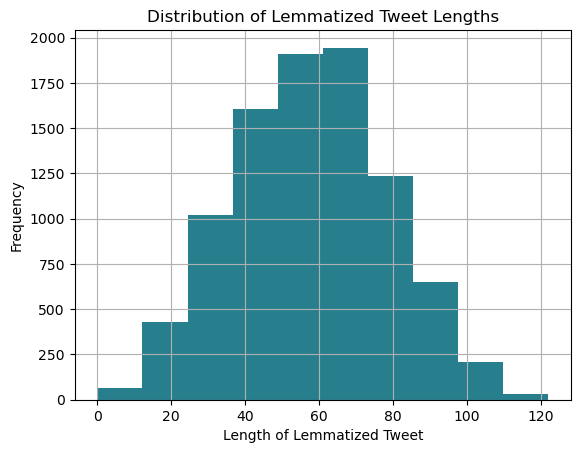

In [83]:
# Plotting a histogram to visualize the `lemmatized tweet` column
colors = sns.color_palette("viridis")  # Get the viridis palette
df['lemmatized_tweet'].str.len().hist(color=colors[2])  # Use the second color (green)
plt.xlabel('Length of Lemmatized Tweet')
plt.ylabel('Frequency')
plt.title('Distribution of Lemmatized Tweet Lengths')
plt.show()

 **Observation**

The histogram shows that news lemmatized tweets range from 10 to 140 characters

There appears to be a normal distribution

**A histogram to visualize the average length of words in google and apple products tweets**

The overall average word length is: 5.584188233839111


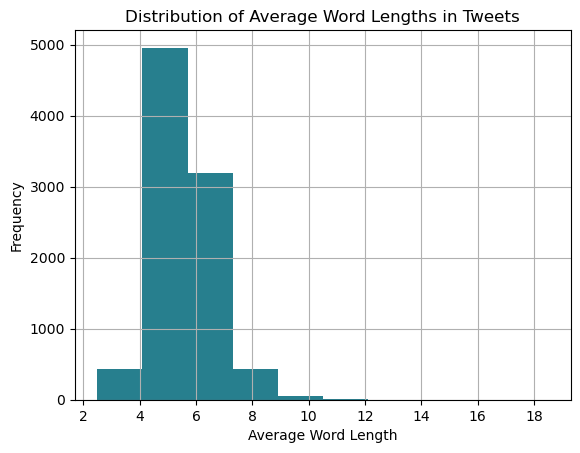

In [84]:
# A histogram to visualize the average length of words in google and apple products tweets
"""
calculates the average word length for each tweet, and then creates a
histogram to display the distribution of these average word lengths.
"""

# Handle potential float values in 'lemmatized_tweet' column
df['lemmatized_tweet'] = df['lemmatized_tweet'].astype(str)

# Calculate average word lengths and plot histogram with viridis palette
colors = sns.color_palette("viridis")
df['lemmatized_tweet'].str.split().\
   apply(lambda x : [len(i) for i in x]).\
   map(lambda x: np.mean(x)).hist(color=colors[2]); # Use the second color in the viridis palette

# calculating average word lengths

average_word_lengths = df['lemmatized_tweet'].str.split().\
   apply(lambda x : [len(i) for i in x]).\
   map(lambda x: np.mean(x))

overall_average = average_word_lengths.mean()

print("The overall average word length is:", overall_average)

plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Average Word Lengths in Tweets')
plt.show()

**Observation**

The histogram shows that the average word length in these tweets is 5 words, with most tweets falling within the range of 4-5.

**Visualizing the most frequent Bargrams used in the dataset**

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

Text(0.5, 1.0, 'Top 5 Most Frequent Bigrams')

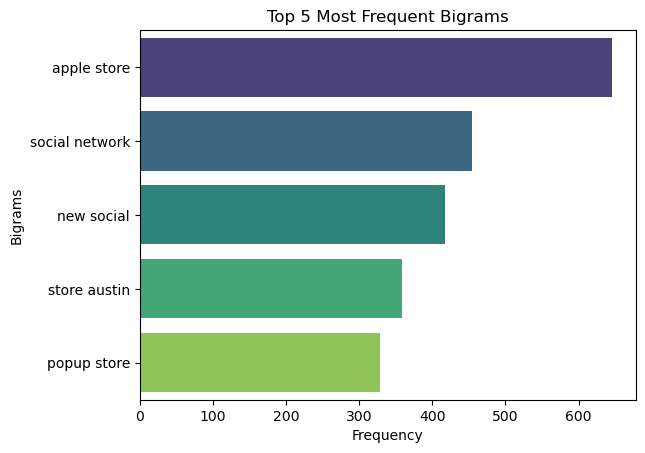

In [86]:
top_n_bigrams=get_top_ngram(df['lemmatized_tweet'],2)[:5]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x, palette='viridis')
plt.xlabel('Frequency')  # Label for the x-axis
plt.ylabel('Bigrams')   # Label for the y-axis
plt.title('Top 5 Most Frequent Bigrams') #Title

**Observation**

We can observe that the bigrams such as Apple store are mostly related to dominating the Google and Apple products tweets. Bigrams such as "rt mention" dominating the dataset suggest that many tweets are retweets or mentions, typically used to highlight trending topics, news, and user opinions. This can imply that discussions about Apple and Google products are significantly influenced by social sharing and user interactions on the platform

##### A bar plot showing overview of the products

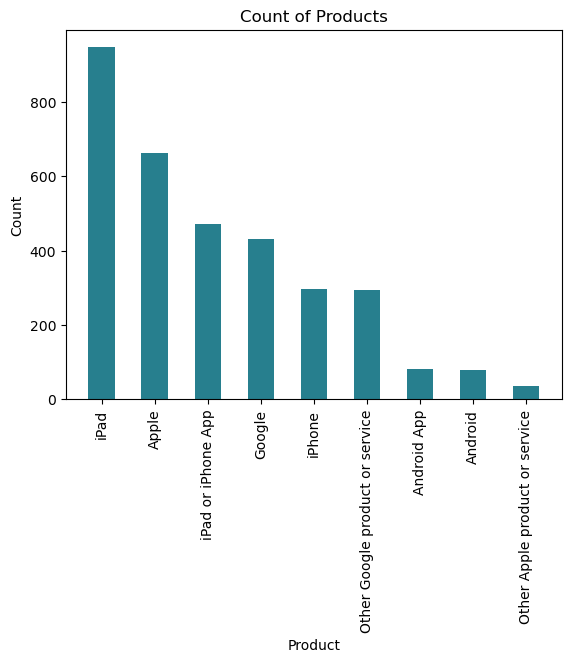

In [87]:
# Plotting the overview of the products
colors = sns.color_palette("viridis")  # Get the viridis palette
df['product'].value_counts()
plt.bar(df['product'].value_counts().index, df['product'].value_counts(), width=.5, color=colors[2]) # Use color instead of colors
plt.xticks(rotation=90);
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Count of Products')
plt.show()

**Observations**

The plot above suggests that iPad and apple is the Most Frequently Discussed Products


### Bivalent analysis

#### Bar plots showing the top positive,negative and neutral sentiments

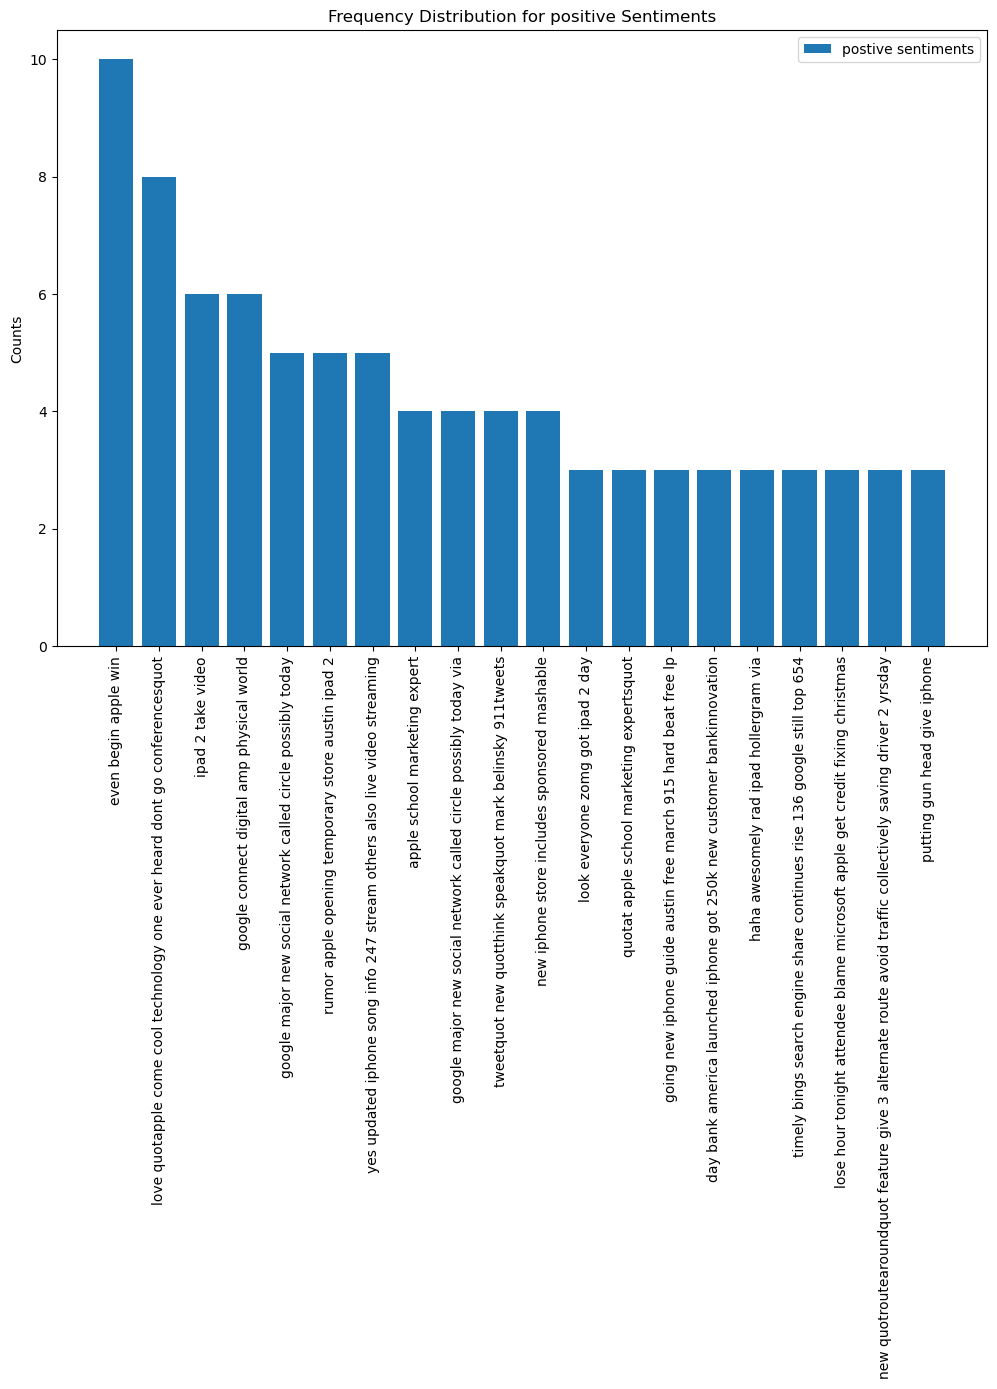

In [88]:
# Plotting the overview of the products
colors = sns.color_palette("viridis")
positive_emotions_data = df[df['emotion'] == 'Positive emotion']
# Extract top 20 tokens and their values for apple brand
positive_top_20 = FreqDist(positive_emotions_data['lemmatized_tweet'].explode()).most_common(20)
positive_categories, positive_values = zip(*positive_top_20)

# Create a bar plot for neutral emotions
plt.figure(figsize=(12, 8))
plt.bar(positive_categories, positive_values, label='postive sentiments')
plt.ylabel('Counts')
plt.title('Frequency Distribution for positive Sentiments')
plt.xticks(rotation=90)
plt.legend();




**Observation (positive)**

Analyzing the most frequent words in positive tweet sentiments reveals interesting insights into customer sentiment toward Apple and Google products. For instance, words like iPad and Google dominate positive sentiments towards Apple, indicating a strong appreciation for it’s On the other hand, positive tweets about Google frequently feature words like google This analysis helps google and Apple to understand the specific aspects that drive positive sentiment for each brand, enabling them to tailor marketing strategies and product recommendations accordingly


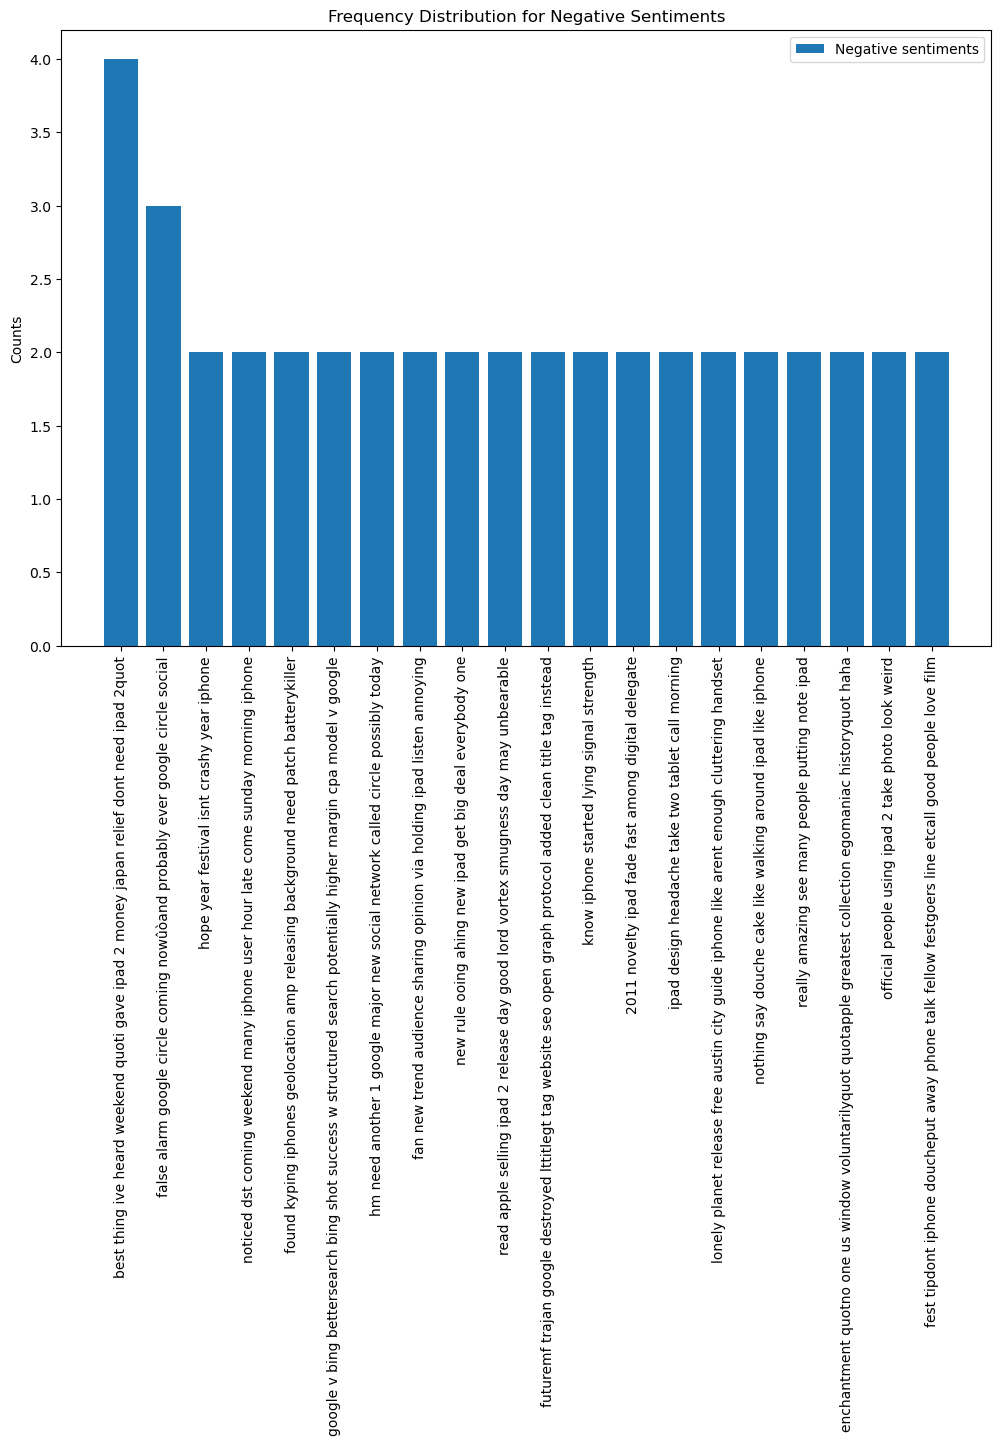

In [89]:
negative_emotions_data = df[df['emotion'] == 'Negative emotion']

# Extract top 20 tokens and their values for google brand
negative_top_20 = FreqDist(negative_emotions_data['lemmatized_tweet'].explode()).most_common(20)
negative_categories, negative_values = zip(*negative_top_20)

# Create a bar plot for neutral emotions
plt.figure(figsize=(12, 8))
plt.bar(negative_categories, negative_values, label='Negative sentiments')
plt.ylabel('Counts')
plt.title('Frequency Distribution for Negative Sentiments')
plt.xticks(rotation=90)
plt.legend();

**Observation (negative)**

Negative sentiment analysis reveals frequent words like iPad, iPhone, and google indicating customer dissatisfaction with product pricing, performance issues, and potential usability concerns for certain Apple and Google devices.


#### Combining the `I can't tell class` with the `Neutral emotion` class

In [90]:
# Combine "I can't tell" and "Neutral emotion" into "Neutral emotion"
df['emotion'] = df['emotion'].apply(lambda x: "Neutral emotion" if x in ["Neutral emotion", "I can't tell"] else x)
df['emotion'].value_counts()

emotion
Neutral emotion     5544
Positive emotion    2978
Negative emotion     570
Name: count, dtype: int64

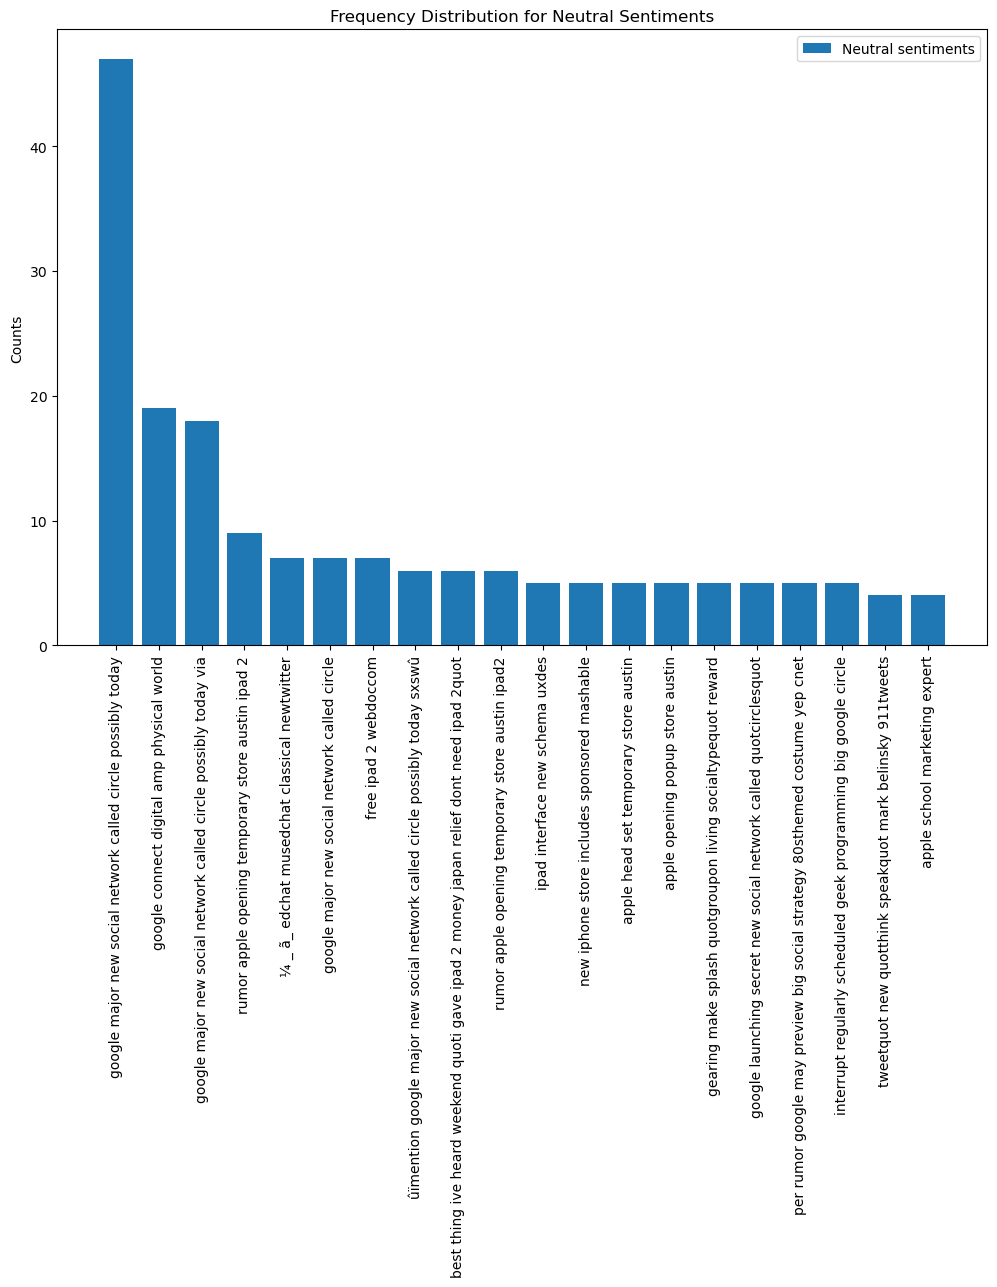

In [91]:
# Extract top 20 tokens and their values for apple brand
neutral_emotions_data = df[df['emotion'] == 'Neutral emotion']

neutral_top_20 = FreqDist(neutral_emotions_data['lemmatized_tweet'].explode()).most_common(20)
neutral_categories, neutral_values = zip(*neutral_top_20)
# Create a bar plot for neutral emotions
plt.figure(figsize=(12, 8))
plt.bar(neutral_categories, neutral_values, label='Neutral sentiments', colormap='viridis')
plt.ylabel('Counts')
plt.title('Frequency Distribution for Neutral Sentiments')
plt.xticks(rotation=90)
plt.legend();

**Observations(neutral)**

Neutral sentiment tweets often contain words like `google, ipad, apple` suggesting a focus on factual information and news regarding Apple and Google products, rather than expressing strong opinions.

### Visualizing  between company name and emotion

<Figure size 1200x600 with 0 Axes>

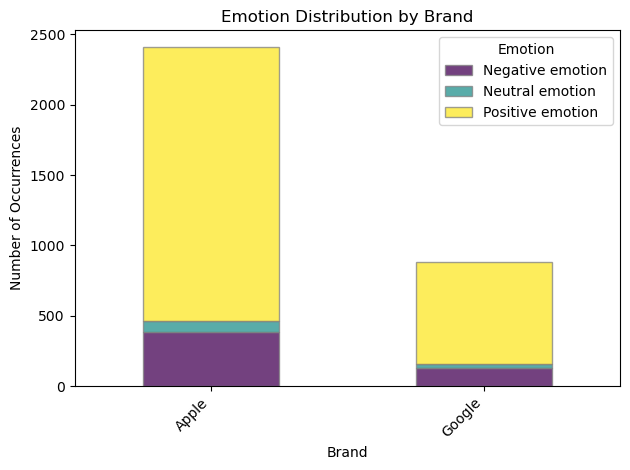

In [120]:
# Count the number of occurrences for each emotion per brand
emotion_counts = df.groupby(['company_name', 'emotion']).size().unstack(fill_value=0)

# Plotting emotion_counts
plt.figure(figsize=(12, 6))
emotion_counts.plot(kind='bar', stacked=True, colormap='viridis', alpha=0.75, edgecolor='grey')
plt.title('Emotion Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Occurrences')
plt.legend(title='Emotion')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Observation**

The best brand in regard to postive sentiments is Google while  the worst in terms of negative sentiments is Apple

#### Identifying the most frequent used words used by google and apple products

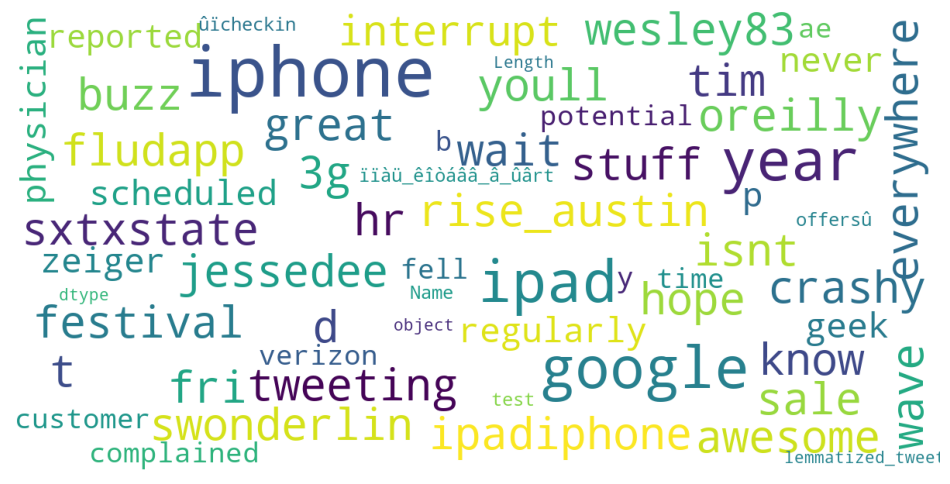

In [92]:
# %pip install wordcloud

from nltk import corpus
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

# show_wordcloud(corpus)
show_wordcloud(df['lemmatized_tweet'])

**Observation**

The large words in the word cloud provide a snapshot of the key topics and sentiments in our dataset. By focusing on these prominent terms, we can gain insights into user opinions, event influences, and brand mentions, which are crucial for the analysis of sentiment towards Apple and Google products.

The most frequently use words in the google and apple products tweets is `google, ipadiphone,ipad, iphone`

#### Word Clouds to give better Visuals on Different sentiments

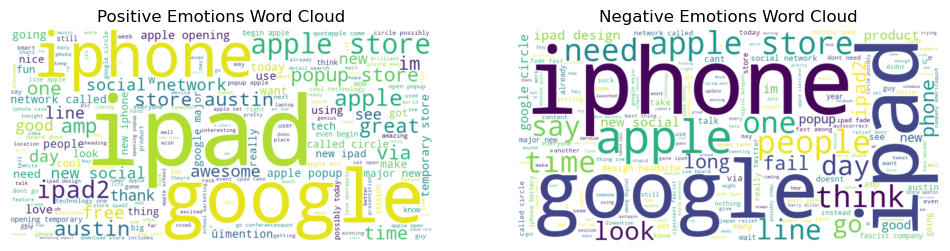

In [94]:
# Word Cloud representation
# Combine tokenized tweets into text strings
positive_text = ' '.join(positive_emotions_data['lemmatized_tweet'].explode())
negative_text = ' '.join(negative_emotions_data['lemmatized_tweet'].explode())
neutral_text = ' '.join(positive_emotions_data['lemmatized_tweet'].explode())

# Create word clouds for positive and negative emotions
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Plot word clouds
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Emotions Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Emotions Word Cloud')
plt.axis('off')

plt.show()

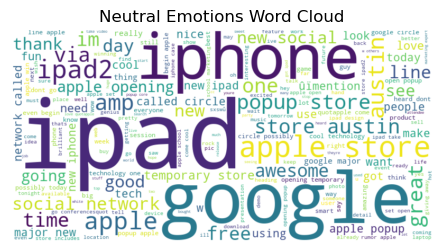

In [95]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the first subplot
plt.subplot(1, 2, 1)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Emotions Word Cloud')
plt.axis('off')

# Display the plot
plt.show()

#### Analysis the length of words in each lemmatized_tweet

In [96]:
df['word_length'] = df['lemmatized_tweet'].str.split().apply(lambda x: [len(i) for i in x])
df

,tweet,product,emotion,cleaned_tweet,tokenized_tweet,removed_stop_tweet,lemmatized_tweet,company_name,word_length
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,wesley83 i have a 3g iphone after 3 hrs tweeti...,"[wesley83, i, have, a, 3g, iphone, after, 3, h...","[wesley83, 3g, iphone, 3, hrs, tweeting, rise_...",wesley83 3g iphone 3 hr tweeting rise_austin d...,Apple,"[8, 2, 6, 1, 2, 8, 11, 4, 4, 7, 6, 7]"
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,jessedee know about fludapp awesome ipadiphone...,"[jessedee, know, about, fludapp, awesome, ipad...","[jessedee, know, fludapp, awesome, ipadiphone,...",jessedee know fludapp awesome ipadiphone youll...,Apple,"[8, 4, 7, 7, 10, 5, 6, 10, 6, 4, 6, 6, 4, 1]"
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,swonderlin can not wait for ipad 2 also they s...,"[swonderlin, can, not, wait, for, ipad, 2, als...","[swonderlin, wait, ipad, 2, also, sale]",swonderlin wait ipad 2 also sale,Apple,"[10, 4, 4, 1, 4, 4]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,sxsw i hope this years festival isnt as crashy...,"[sxsw, i, hope, this, years, festival, isnt, a...","[hope, years, festival, isnt, crashy, years, i...",hope year festival isnt crashy year iphone,Apple,"[4, 4, 8, 4, 6, 4, 6]"
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,sxtxstate great stuff on fri sxsw marissa maye...,"[sxtxstate, great, stuff, on, fri, sxsw, maris...","[sxtxstate, great, stuff, fri, google, tim, or...",sxtxstate great stuff fri google tim oreilly t...,Google,"[9, 5, 5, 3, 6, 3, 7, 4, 16, 3, 4, 9, 9]"
...,...,...,...,...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,ipad everywhere sxsw link,"[ipad, everywhere, sxsw, link]","[ipad, everywhere]",ipad everywhere,Apple,"[4, 10]"
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,Neutral emotion,wave buzz rt mention we interrupt your regular...,"[wave, buzz, rt, mention, we, interrupt, your,...","[wave, buzz, interrupt, regularly, scheduled, ...",wave buzz interrupt regularly scheduled geek p...,NaN,"[4, 4, 9, 9, 9, 4, 11, 3, 6, 6]"
9090,"Google's Zeiger, a physician never reported po...",NaN,Neutral emotion,googles zeiger a physician never reported pote...,"[googles, zeiger, a, physician, never, reporte...","[zeiger, physician, never, reported, potential...",zeiger physician never reported potential ae y...,NaN,"[6, 9, 5, 8, 9, 2, 3, 3, 6, 9, 8, 9, 4, 8, 10]"
9091,Some Verizon iPhone customers complained their...,NaN,Neutral emotion,some verizon iphone customers complained their...,"[some, verizon, iphone, customers, complained,...","[verizon, iphone, customers, complained, time,...",verizon iphone customer complained time fell b...,NaN,"[7, 6, 8, 10, 4, 4, 4, 4, 7, 6, 3, 7, 8]"


We are done with analysis lets proceed to modelling

## Modelling

## Binary Classification

In [97]:
# Filter the DataFrame to include only 'Positive emotion' and 'Negative emotion'
binary_df = df[df['emotion'].isin(['Positive emotion', 'Negative emotion'])]

# Initialize LabelEncoder
le_encoder = LabelEncoder()

# Encode 'Positive emotion' as 1 and 'Negative emotion' as 0
binary_df['emotion_encoded'] = le_encoder.fit_transform(binary_df['emotion'])

# Display the distribution of encoded emotions
print(binary_df['emotion_encoded'].value_counts())

# If you want to check the mapping of labels to encoded values
print(dict(zip(le_encoder.classes_, le_encoder.transform(le_encoder.classes_))))


emotion_encoded
1    2978
0     570
Name: count, dtype: int64
{'Negative emotion': 0, 'Positive emotion': 1}


**Logistic regression (base model)**

In [98]:
# Define features (tweets) and target variable (encoded emotions)
X = binary_df['tweet']
y = binary_df['emotion_encoded']

# Split the data into training and testing sets
# Use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that includes TF-IDF vectorization, SMOTE for handling class imbalance, and Logistic Regression
clf_pipe = imPipeline([
    ('vectorizer', TfidfVectorizer()),         # Step 1: Convert text data into TF-IDF features
    ('smote', SMOTE(random_state=42)),         # Step 2: Apply SMOTE to balance the classes
    ('classifier', LogisticRegression())       # Step 3: Use Logistic Regression as the classifier
])

# Fit the pipeline on the training data
clf_pipe.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('smote', SMOTE(random_state=42)),
                ('classifier', LogisticRegression())])

## Evaluating the model

In [99]:
def evaluate_classification(clf_pipe, X_train, y_train, X_test, y_test, pos_label=1):
    """
    Evaluate the performance of a classification model, including confusion matrix, classification report, ROC curve, and AUC.

    Parameters:
    clf_pipe (Pipeline): The trained classifier pipeline.
    X_train (array-like): The training data.
    y_train (array-like): The true labels for the training data.
    X_test (array-like): The test data.
    y_test (array-like): The true labels for the test data.
    pos_label (int or str): The positive class label. Default is 1.

    Returns:
    None
    """
    # Generate predictions
    y_pred = clf_pipe.predict(X_test)

    # Print classification report
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Print confusion matrix
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

    # Visualize the confusion matrix
    cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Negative', 'Positive'])
    cm_display.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    # Use predict_proba for obtaining probabilities
    y_train_score = clf_pipe.predict_proba(X_train)[:, 1]
    y_test_score = clf_pipe.predict_proba(X_test)[:, 1]

    # Debugging: Print unique scores
    # print("Unique train scores:", np.unique(y_train_score))
    # print("Unique test scores:", np.unique(y_test_score))

    # ROC Curve
    plt.figure(figsize=(10, 7))

    if len(np.unique(y_train_score)) > 1:
        # Calculate ROC curve for train data
        train_fpr, train_tpr, _ = roc_curve(y_train, y_train_score, pos_label=pos_label)
        train_auc = auc(train_fpr, train_tpr)
        print('Train AUC: {:.2f}'.format(train_auc))

        # Plot ROC curve for train data
        plt.plot(train_fpr, train_tpr, color='darkorange', lw=2, label='Train ROC curve (AUC = {:.2f})'.format(train_auc))
    else:
        print("Train AUC: Cannot be calculated (only one class present in predictions)")

    if len(np.unique(y_test_score)) > 1:
        # Calculate ROC curve for test data
        test_fpr, test_tpr, _ = roc_curve(y_test, y_test_score, pos_label=pos_label)
        test_auc = auc(test_fpr, test_tpr)
        print('Test AUC: {:.2f}'.format(test_auc))

        # Plot ROC curve for test data
        plt.plot(test_fpr, test_tpr, color='blue', lw=2, label='Test ROC curve (AUC = {:.2f})'.format(test_auc))
    else:
        print("Test AUC: Cannot be calculated (only one class present in predictions)")

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.69      0.61       115
           1       0.94      0.89      0.91       595

    accuracy                           0.86       710
   macro avg       0.74      0.79      0.76       710
weighted avg       0.87      0.86      0.86       710

Confusion Matrix:
 [[ 79  36]
 [ 66 529]]


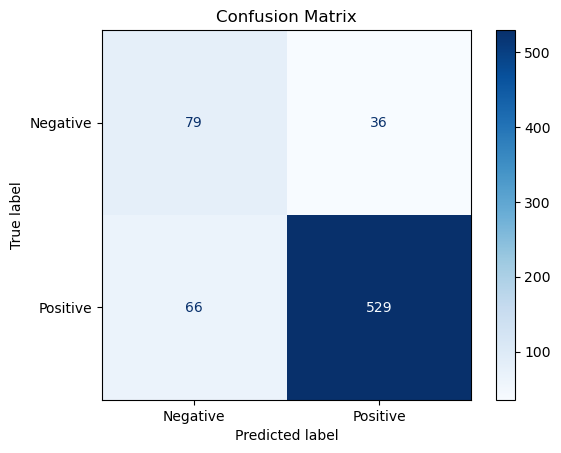

Train AUC: 0.99
Test AUC: 0.87


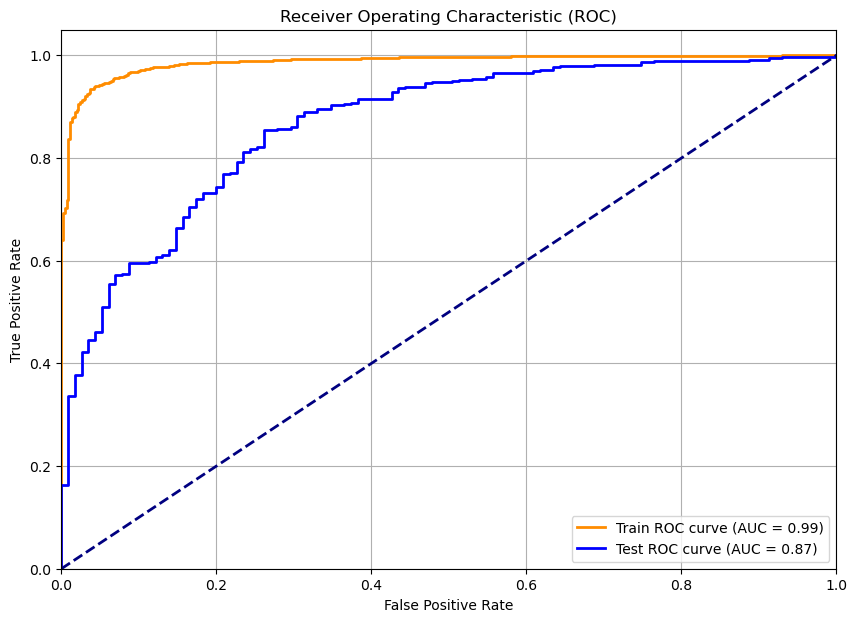

In [100]:
# Evaluate the fitted pipeline
evaluate_classification(clf_pipe, X_train, y_train, X_test, y_test)

### Model Evaluation Report

The logistic regression model achieved an overall accuracy of 85%, indicating a strong performance in classifying the sentiments of tweets. The precision for the positive class (1) is exceptionally high at 0.93, demonstrating the model's capability to accurately identify positive sentiment tweets. Conversely, the precision for the negative class (0) is moderate at 0.54, suggesting room for improvement in correctly predicting negative sentiment tweets.

The recall metrics reveal a similar trend. For the positive class, the recall is high at 0.89, meaning the majority of positive sentiment tweets are correctly identified. However, the recall for the negative class is 0.68, indicating that a notable proportion of negative sentiment tweets are misclassified as positive.

The F1-scores, which harmonize precision and recall, are 0.91 for the positive class and 0.60 for the negative class. This discrepancy underscores the model's challenge in handling negative sentiment tweets as effectively as positive ones.

The AUC scores further illustrate the model's performance. The training AUC is exceptionally high at 0.99, while the test AUC is lower at 0.87. This significant difference points to potential overfitting, where the model performs well on the training data but less so on unseen test data.

In summary, the logistic regression model is highly proficient at predicting positive sentiment tweets but shows limitations in classifying negative sentiment tweets. The performance gap between the training and test data suggests that the model may benefit from further tuning or additional data to enhance its generalization capability.

**Naive's Bayes**

In [101]:
# Create a pipeline
clf_pipe = imPipeline([
    ('vectorizer', TfidfVectorizer()),         # Step 1: Transform the text data to TF-IDF features
    ('smote', SMOTE(random_state=42)),         # Step 2: Apply SMOTE to handle class imbalance
    ('classifier', MultinomialNB(alpha=0.01))  # Step 3: Train a Multinomial Naive Bayes classifier
])

# Fit the pipeline to the training data
clf_pipe.fit(X_train, y_train)  # Fit the entire pipeline on the training data (X_train and y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('smote', SMOTE(random_state=42)),
                ('classifier', MultinomialNB(alpha=0.01))])


Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.55      0.54       115
           1       0.91      0.91      0.91       595

    accuracy                           0.85       710
   macro avg       0.72      0.73      0.72       710
weighted avg       0.85      0.85      0.85       710

Confusion Matrix:
 [[ 63  52]
 [ 56 539]]


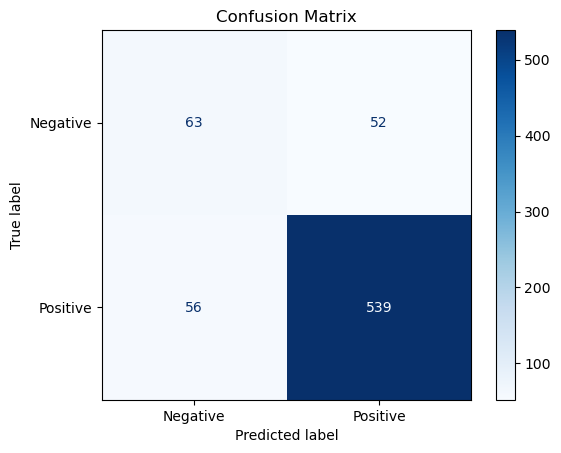

Train AUC: 1.00
Test AUC: 0.83


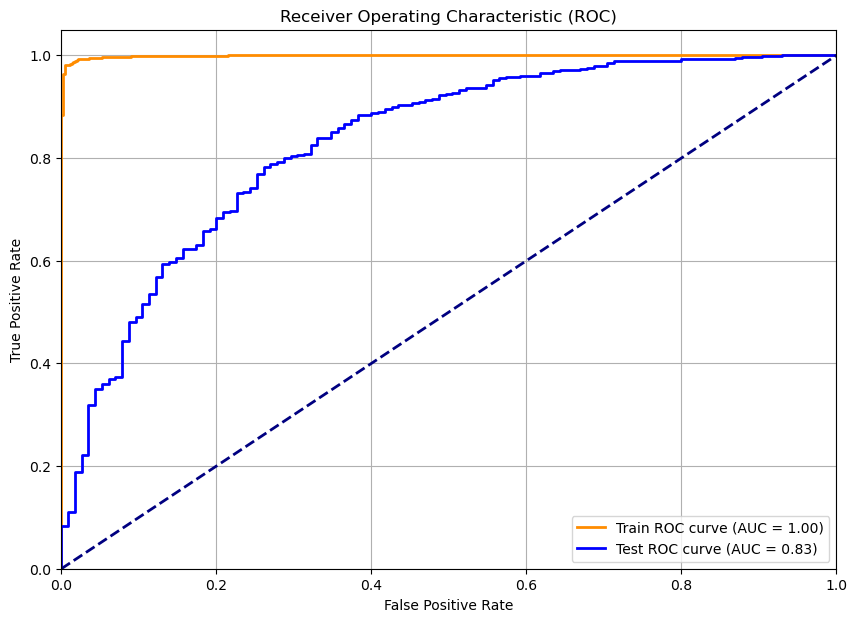

In [102]:
# Evaluate the fitted pipeline
evaluate_classification(clf_pipe, X_train, y_train, X_test, y_test)

### Model Evaluation Report

The Naive Bayes model achieved an overall accuracy of 85%, reflecting its robust performance in sentiment classification for tweets. The precision for the positive class (1) is notably high at 0.91, indicating the model's strong capability to correctly identify positive sentiment tweets. In contrast, the precision for the negative class (0) is moderate at 0.53, suggesting that the model has some difficulty accurately predicting negative sentiment tweets.

The recall metrics show that the model effectively identifies positive sentiment tweets with a high recall of 0.91. However, the recall for the negative class is 0.55, indicating that a substantial portion of negative sentiment tweets are being misclassified as positive.

The F1-scores, which balance precision and recall, are 0.91 for the positive class and 0.54 for the negative class. This discrepancy highlights the challenge the model faces in accurately classifying negative sentiment tweets.

The confusion matrix reveals that the model correctly classified 63 out of 115 negative sentiment tweets and 539 out of 595 positive sentiment tweets. However, 52 negative tweets were misclassified as positive, and 56 positive tweets were misclassified as negative.

The AUC scores provide further insight into the model's performance. The training AUC is perfect at 1.00, while the test AUC is lower at 0.83. This significant gap suggests the model may be overfitting to the training data, resulting in reduced generalization to new data.

In summary, the Naive Bayes model excels at predicting positive sentiment tweets but shows limitations in classifying negative sentiment tweets. The difference between the training and test AUC scores indicates potential overfitting, suggesting that the model could benefit from further tuning or additional data to improve its ability to generalize.

**Random forest**

In [103]:
# Create a pipeline
clf_pipe = imPipeline([
    ('vectorizer', TfidfVectorizer()),         # Step 1: Transform the text data into TF-IDF features
    ('smote', SMOTE(random_state=42)),         # Step 2: Apply SMOTE to handle class imbalance
    ('classifier', RandomForestClassifier(     # Step 3: Train a RandomForest classifier
        random_state=42,                       # Set random state for reproducibility
        n_estimators=1000,                     # Number of trees in the forest
        max_depth=10,                          # Maximum depth of each tree
        class_weight='balanced',               # Adjust weights inversely proportional to class frequencies
        verbose=1                              # Enable verbose output
    ))
])

# Fit the pipeline to the training data
clf_pipe.fit(X_train, y_train)  # Fit the entire pipeline on the training data (X_train and y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    8.7s finished


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        n_estimators=1000, random_state=42,
                                        verbose=1))])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished



Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.42      0.50       115
           1       0.89      0.95      0.92       595

    accuracy                           0.86       710
   macro avg       0.76      0.68      0.71       710
weighted avg       0.85      0.86      0.85       710

Confusion Matrix:
 [[ 48  67]
 [ 29 566]]


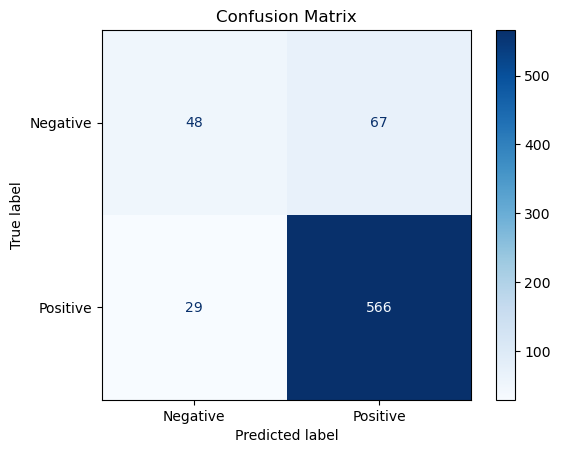

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train AUC: 0.94
Test AUC: 0.82


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


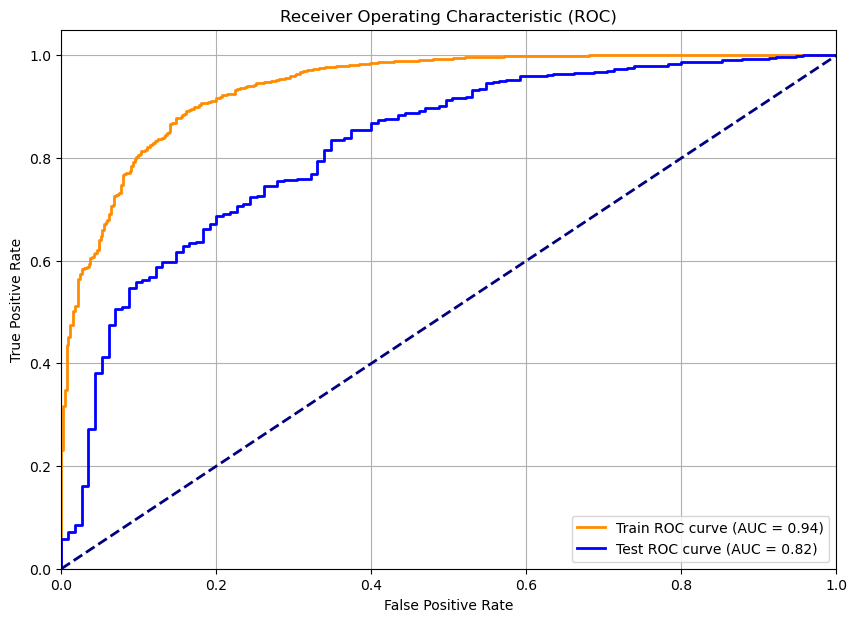

In [104]:
# Evaluate the fitted pipeline
evaluate_classification(clf_pipe, X_train, y_train, X_test, y_test)

### Model Evaluation Report

The Random Forest model demonstrated a solid overall accuracy of 86%, indicating effective performance in classifying tweet sentiments. The precision for the positive class (1) is high at 0.89, reflecting the model's strong ability to correctly identify positive sentiment tweets. However, the precision for the negative class (0) is lower at 0.62, suggesting that the model has some challenges in accurately predicting negative sentiment tweets.

The recall metrics further illustrate this trend. The model achieves a high recall of 0.95 for the positive class, meaning it correctly identifies the vast majority of positive sentiment tweets. In contrast, the recall for the negative class is 0.42, indicating that more than half of the negative sentiment tweets are being misclassified as positive.

The F1-scores, which balance precision and recall, are 0.92 for the positive class and 0.50 for the negative class. This discrepancy underscores the model's difficulty in handling negative sentiment tweets as effectively as positive ones.

The confusion matrix shows that the model correctly classified 48 out of 115 negative sentiment tweets and 566 out of 595 positive sentiment tweets. However, 67 negative tweets were misclassified as positive, and 29 positive tweets were misclassified as negative.

The AUC scores provide additional insight into the model's performance. The training AUC is 0.94, while the test AUC is slightly lower at 0.82. This gap suggests potential overfitting, where the model performs well on the training data but less so on unseen test data.

In summary, the Random Forest model is highly effective at predicting positive sentiment tweets but shows limitations in accurately classifying negative sentiment tweets. The difference between the training and test AUC scores indicates some overfitting, suggesting that the model could benefit from further tuning or additional data to enhance its generalization capability.

## Tune the random forest model

In [105]:
# Define the parameter distributions to sample from
param_distributions = {
    'classifier__n_estimators': randint(100, 1000),         # Randomly sample number of trees
    'classifier__max_depth': [None, 10, 20, 30],             # Fixed options for max depth
    'classifier__min_samples_split': randint(2, 10),          # Randomly sample min samples for split
    'classifier__min_samples_leaf': randint(1, 4),            # Randomly sample min samples for leaf
    'classifier__max_features': ['auto', 'sqrt', 'log2'],     # Fixed options for max features
    'classifier__class_weight': [None, 'balanced']            # Fixed options for class weights
}

# Create a pipeline
clf_pipe = imPipeline([
    ('vectorizer', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, verbose=1))
])

# Set up RandomizedSearchCV with 20 iterations
randomized_search = RandomizedSearchCV(
    clf_pipe,
    param_distributions,
    n_iter=20,          # Number of parameter settings to sample
    cv=5,                # 5-fold cross-validation
    scoring='f1_weighted',  # Use weighted F1 score
    verbose=2,           # Print progress messages
    n_jobs=-1,           # Use all available cores
    random_state=42     # Set random seed for reproducibility
)

# Fit the model
randomized_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = randomized_search.best_params_
best_model = randomized_search.best_estimator_

print("Best parameters found: ", best_params)
print("Best model: ", best_model)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters found:  {'classifier__class_weight': None, 'classifier__max_depth': 30, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 8, 'classifier__n_estimators': 351}
Best model:  Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(max_depth=30, max_features='log2',
                                        min_samples_leaf=2, min_samples_split=8,
                                        n_estimators=351, random_state=42,
                                        verbose=1))])


[Parallel(n_jobs=1)]: Done 351 out of 351 | elapsed:    1.6s finished


In [106]:
# Predict on test set
y_pred = best_model.predict(X_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 351 out of 351 | elapsed:    0.0s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 351 out of 351 | elapsed:    0.0s finished



Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.32      0.42       115
           1       0.88      0.96      0.92       595

    accuracy                           0.86       710
   macro avg       0.74      0.64      0.67       710
weighted avg       0.84      0.86      0.84       710

Confusion Matrix:
 [[ 37  78]
 [ 24 571]]


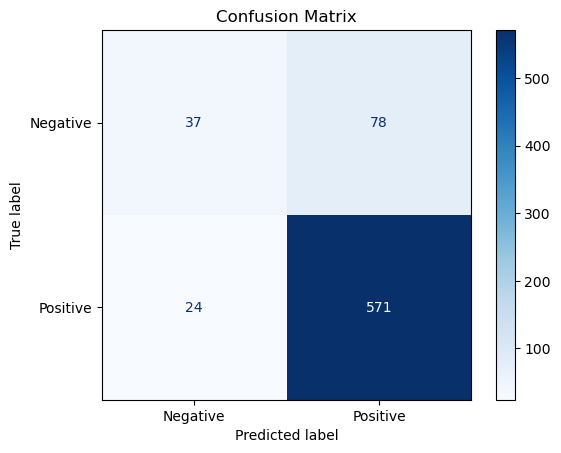

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 351 out of 351 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 351 out of 351 | elapsed:    0.0s finished


Train AUC: 0.95
Test AUC: 0.83


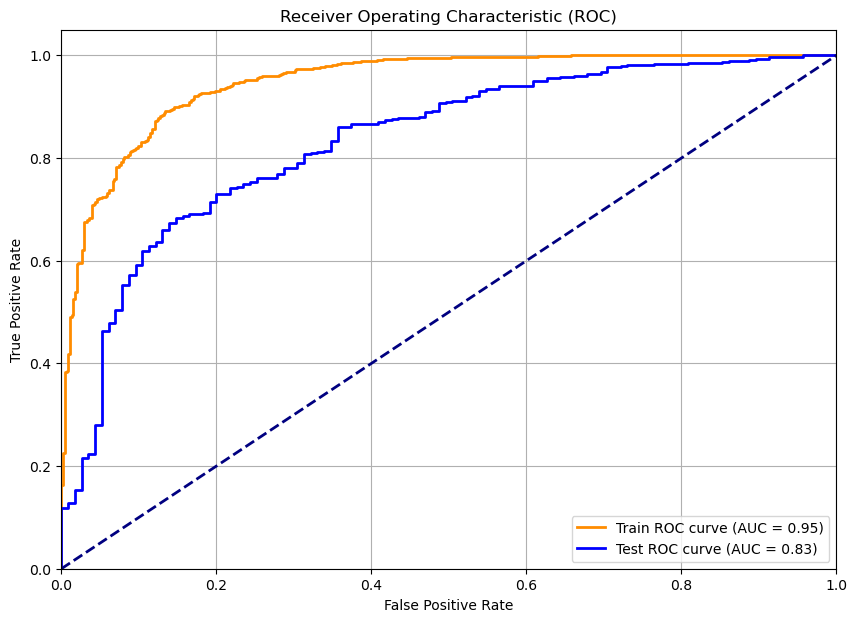

In [107]:
# Call the function to evaluate the model
evaluate_classification(best_model, X_train, y_train, X_test, y_test)

### Model Evaluation Report

The tuned Random Forest model achieved an overall accuracy of 86%, indicating strong performance in classifying tweet sentiments. The model has a precision of 0.88 for the positive class (1), demonstrating its effectiveness in correctly identifying positive sentiment tweets. However, its precision for the negative class (0) is lower at 0.61, suggesting some difficulty in accurately predicting negative sentiment tweets. The recall for the positive class is high at 0.96, meaning the model is very effective at detecting positive sentiment tweets. On the other hand, the recall for the negative class is lower at 0.32, indicating that a significant number of negative sentiment tweets are misclassified as positive. The F1-score for the positive class is 0.92, reflecting a good balance between precision and recall. For the negative class, the F1-score is 0.42, highlighting the challenge in accurately classifying negative sentiment tweets.

The confusion matrix shows that the model correctly classified 37 out of 115 negative sentiment tweets and 571 out of 595 positive sentiment tweets. However, 78 negative tweets were misclassified as positive, and 24 positive tweets were misclassified as negative. The model’s AUC score is 0.83, indicating good overall performance but with room for improvement, especially in the context of class imbalance.

In summary, the tuned Random Forest model performs well in predicting positive sentiment tweets, with high precision and recall for this class. However, it struggles with negative sentiment predictions, as evidenced by lower precision and recall for the negative class. The AUC score and classification metrics suggest that while the model is effective, further improvements could be made, particularly in enhancing the recall for the negative sentiment class. Consider additional tuning or exploring techniques like class balancing or feature engineering to address the imbalance and improve overall performance on negative sentiment tweets.

## Multi Class Classification

**Multinomial Naive Bayes**

In [108]:
# Filter the DataFrame to include only 'Positive emotion', 'Negative emotion', and 'Neutral emotion'
multiclass_df = df[df['emotion'].isin(['Positive emotion', 'Negative emotion', 'Neutral emotion'])]

# Initialize LabelEncoder
le_encoder = LabelEncoder()

# Encode the emotions
multiclass_df['emotion_encoded'] = le_encoder.fit_transform(multiclass_df['emotion'])

# Display the distribution of encoded emotions
print(multiclass_df['emotion_encoded'].value_counts())

# Check the mapping of labels to encoded values
print(dict(zip(le_encoder.classes_, le_encoder.transform(le_encoder.classes_))))

# Prepare features and target
X = multiclass_df['lemmatized_tweet']
y = multiclass_df['emotion_encoded']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the distribution in the train and test sets
print("Training set distribution:\n", y_train.value_counts())
print("Test set distribution:\n", y_test.value_counts())

emotion_encoded
1    5544
2    2978
0     570
Name: count, dtype: int64
{'Negative emotion': 0, 'Neutral emotion': 1, 'Positive emotion': 2}
Training set distribution:
 emotion_encoded
1    4435
2    2382
0     456
Name: count, dtype: int64
Test set distribution:
 emotion_encoded
1    1109
2     596
0     114
Name: count, dtype: int64


In [109]:
# Define the pipeline
clf_pipe = imPipeline([
    ('vectorizer', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', MultinomialNB())
])

# Fit the pipeline
clf_pipe.fit(X_train, y_train)

# Make predictions
y_pred = clf_pipe.predict(X_test)

# Check shapes again
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))

Length of y_test: 1819
Length of y_pred: 1819


## Model Evaluation

In [110]:
def evaluate_multiclass_model(y_true, y_pred, class_labels):
    """
    Evaluate a multiclass classification model with classification report,
    confusion matrix, and ROC curve.

    Parameters:
    - y_true: array-like, true labels
    - y_pred: array-like, predicted labels
    - class_labels: list of class labels

    Returns:
    - None
    """
    # Classification Report
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_display = ConfusionMatrixDisplay(cm, display_labels=class_labels)
    cm_display.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    # ROC AUC for multiclass classification
    # Binarize the output
    y_true_bin = label_binarize(y_true, classes=range(len(class_labels)))
    y_pred_bin = label_binarize(y_pred, classes=range(len(class_labels)))

    plt.figure(figsize=(10, 7))
    auc_scores = {}
    for i in range(y_true_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
        roc_auc = roc_auc_score(y_true_bin[:, i], y_pred_bin[:, i])
        auc_scores[class_labels[i]] = roc_auc
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multiclass Classification')
    plt.legend(loc='lower right')
    plt.show()

    # Print ROC AUC scores
    print("\nROC AUC Scores:")
    for label, auc in auc_scores.items():
        print(f'{label}: {auc:.2f}')


Classification Report:
                   precision    recall  f1-score   support

Negative emotion       0.29      0.63      0.40       114
 Neutral emotion       0.79      0.59      0.68      1109
Positive emotion       0.53      0.67      0.59       596

        accuracy                           0.62      1819
       macro avg       0.54      0.63      0.56      1819
    weighted avg       0.68      0.62      0.63      1819



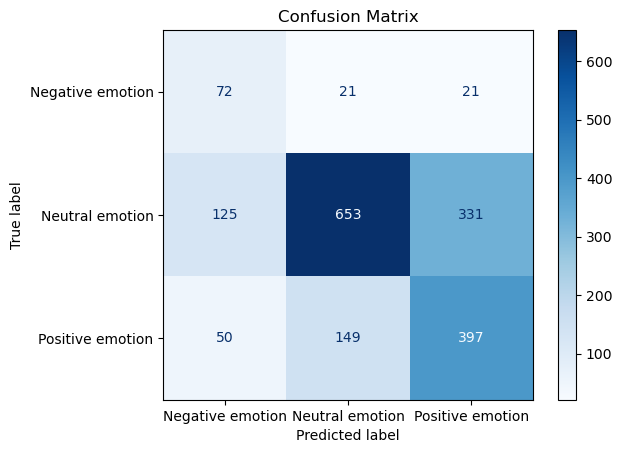

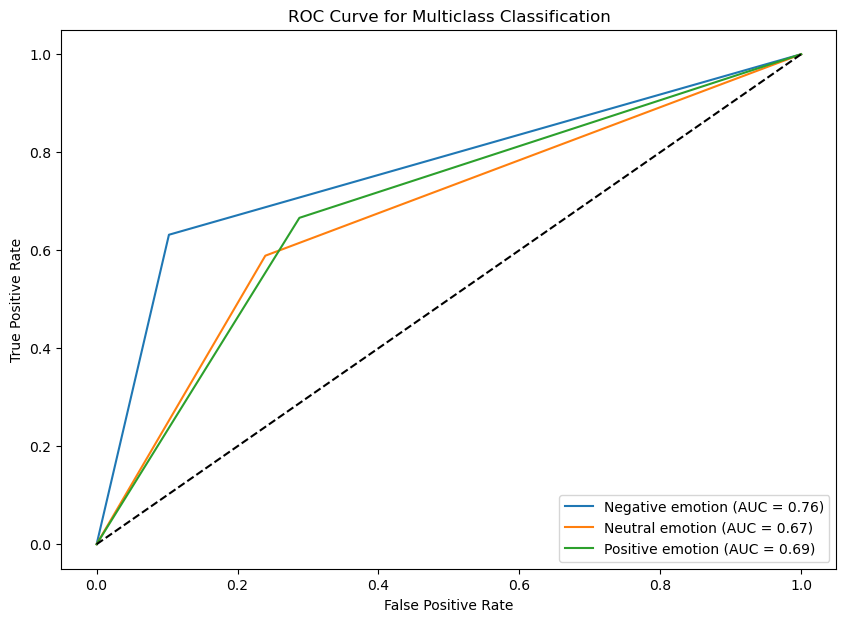


ROC AUC Scores:
Negative emotion: 0.76
Neutral emotion: 0.67
Positive emotion: 0.69


In [111]:
# Call function to evaluate the model
evaluate_multiclass_model(y_test, y_pred, class_labels=['Negative emotion', 'Neutral emotion', 'Positive emotion'])

### Model Evaluation Report

#### Classification Report

- **Negative emotion**: Precision: 0.29, Recall: 0.63, F1-Score: 0.39
  - Low precision indicates frequent misclassification of other emotions as **Negative emotion**. The model is better at detecting **Negative emotion** but with a substantial number of false positives.

- **Neutral emotion**: Precision: 0.81, Recall: 0.58, F1-Score: 0.67
  - High precision with decent recall suggests the model reliably identifies **Neutral emotion**, though it occasionally misses some instances.

- **Positive emotion**: Precision: 0.54, Recall: 0.69, F1-Score: 0.60
  - Balanced performance with good recall, indicating the model identifies **Positive emotion** effectively, but precision could be improved.

- **Overall Accuracy**: 0.62
  - The model achieves 62% accuracy, demonstrating reasonable performance but indicating room for improvement.

#### ROC AUC Scores

- **Negative emotion**: 0.76
- **Neutral emotion**: 0.68
- **Positive emotion**: 0.70

The ROC AUC scores reflect the model's ability to distinguish between classes, with **Negative emotion** having the highest AUC, suggesting the model performs best at distinguishing this class. Overall, the model shows strong discriminatory power but requires enhancements to balance precision and recall across all classes.

### Tune the model

In [112]:
# Define the pipeline
clf_pipe = imPipeline([
    ('vectorizer', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', MultinomialNB())
])

# Define the parameter grid
param_grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],  # Unigrams and bigrams
    'vectorizer__max_df': [0.5, 0.75, 1.0],      # Maximum document frequency
    'vectorizer__min_df': [1, 2, 5],              # Minimum document frequency
    'classifier__alpha': [0.1, 0.5, 1.0, 2.0]    # Smoothing parameter
}

# Set up GridSearchCV
grid_search = GridSearchCV(clf_pipe, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Make predictions with the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Check shapes of the predictions
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))

Best parameters found:  {'classifier__alpha': 0.1, 'vectorizer__max_df': 0.5, 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 2)}
Best score:  0.6347793604031735
Length of y_test: 1819
Length of y_pred: 1819



Classification Report:
                   precision    recall  f1-score   support

Negative emotion       0.41      0.55      0.47       114
 Neutral emotion       0.76      0.68      0.72      1109
Positive emotion       0.55      0.62      0.58       596

        accuracy                           0.65      1819
       macro avg       0.57      0.62      0.59      1819
    weighted avg       0.67      0.65      0.66      1819



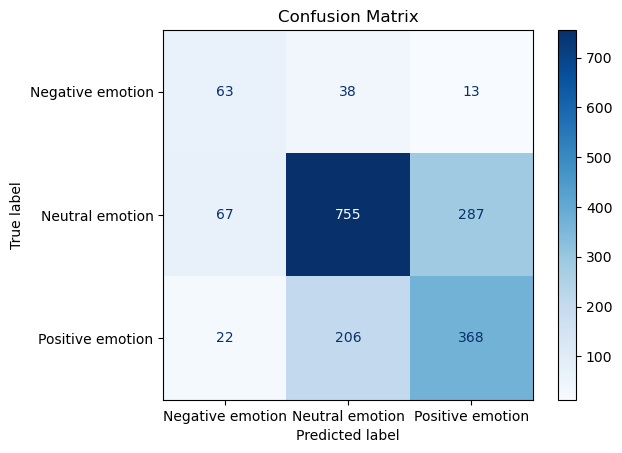

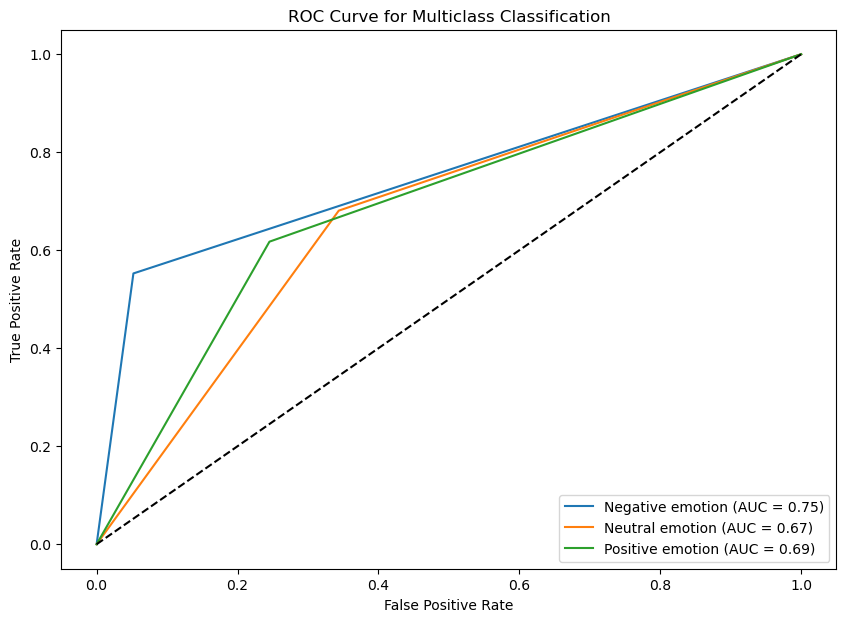


ROC AUC Scores:
Negative emotion: 0.75
Neutral emotion: 0.67
Positive emotion: 0.69


In [113]:
# Call function to evaluate the model
evaluate_multiclass_model(y_test, y_pred, class_labels=['Negative emotion', 'Neutral emotion', 'Positive emotion'])


### Model Evaluation Report

The tuned classification model achieved an overall accuracy of 65 which is an improved of the untuned model which had an accuracy of 62%, , showing moderate performance in classifying tweet sentiments. The precision for negative emotion tweets is 0.42, indicating moderate effectiveness in correctly identifying these tweets, while the recall is higher at 0.55, meaning the model correctly identifies 55% of negative sentiment tweets. For neutral emotion tweets, the model demonstrates strong performance with a precision of 0.76 and a recall of 0.68, effectively detecting the majority of neutral tweets. Positive emotion tweets have a precision of 0.55 and a recall of 0.62, showing reasonable ability in accurate prediction. The F1-scores, which balance precision and recall, are 0.48 for negative emotions, 0.72 for neutral emotions, and 0.58 for positive emotions. The ROC AUC scores provide additional insight, with scores of 0.75 for negative emotions, 0.67 for neutral emotions, and 0.69 for positive emotions, indicating good overall performance but with room for improvement. In summary, while the tuned model performs well in predicting neutral and positive sentiment tweets, it still faces challenges in accurately classifying negative sentiment tweets. Further tuning, class balancing, or feature engineering could help improve its performance.

**GradientBoosting**

In [114]:
clf_pipe = imPipeline([
    ('vectorizer', TfidfVectorizer()),         # Convert text data to TF-IDF features
    ('smote', SMOTE(random_state=42)),          # Apply SMOTE to handle class imbalance
    ('classifier', GradientBoostingClassifier(random_state=42))  # Use Gradient Boosting
])

# Fit the pipeline
clf_pipe.fit(X_train, y_train)

# Make predictions
y_pred = clf_pipe.predict(X_test)

### Model Evaluation


Classification Report:
                   precision    recall  f1-score   support

Negative emotion       0.30      0.29      0.29       114
 Neutral emotion       0.70      0.79      0.74      1109
Positive emotion       0.57      0.43      0.49       596

        accuracy                           0.64      1819
       macro avg       0.52      0.50      0.51      1819
    weighted avg       0.63      0.64      0.63      1819



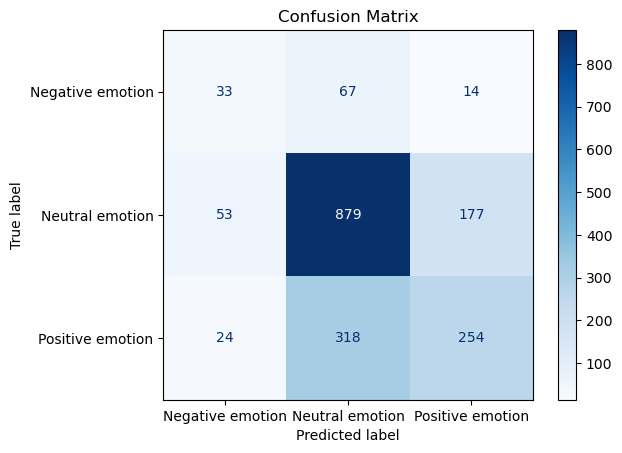

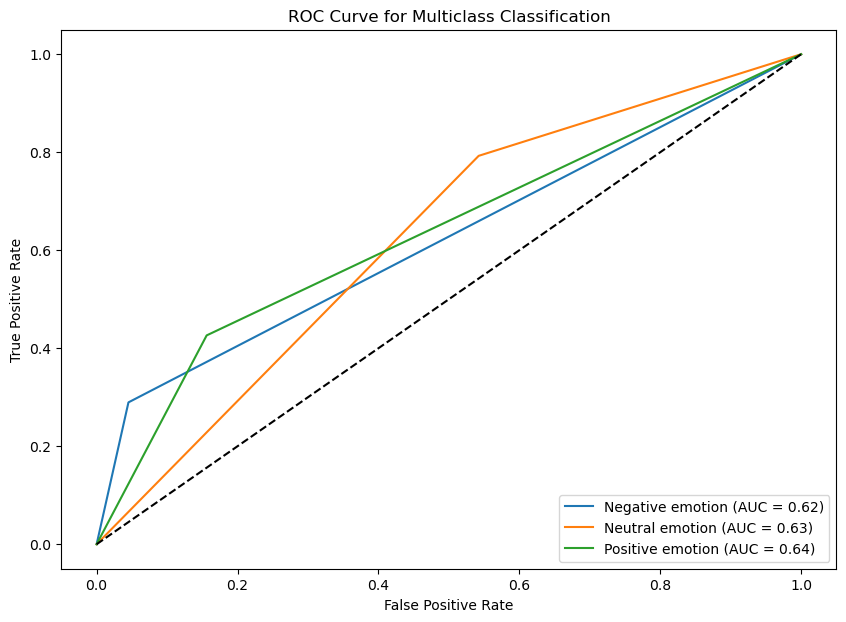


ROC AUC Scores:
Negative emotion: 0.62
Neutral emotion: 0.63
Positive emotion: 0.64


In [115]:
# Call function to evaluate the model
evaluate_multiclass_model(y_test, y_pred, class_labels=['Negative emotion', 'Neutral emotion', 'Positive emotion'])

Accuracy is 64%, indicating the model's general performance across all classes.
Neutral emotion has the highest recall and F1-score, suggesting the model performs relatively well in predicting this class.
Negative emotion has the lowest precision and recall, reflecting challenges in accurately identifying this class.
ROC AUC Scores are relatively close, with Positive emotion showing a slightly better AUC, implying better discrimination performance for this class compared to the others.

### Ensemble Method

In [116]:
from sklearn.ensemble import VotingClassifier

# Define individual classifiers
clf1 = LogisticRegression(max_iter=1000)
clf2 = RandomForestClassifier()
clf3 = MultinomialNB(alpha=0.1)

# Define VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('rf', clf2),
    ('nb', clf3)
], voting='soft')

# Define pipeline with VotingClassifier
pipe_voting = imPipeline([
    ('vectorizer', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', voting_clf)
])

# Save the trained model
joblib.dump(pipe_voting, 'voting_classifier_pipeline.pkl')

# Fit the pipeline
pipe_voting.fit(X_train, y_train)

# Make predictions
y_pred = pipe_voting.predict(X_test)



Classification Report:
                   precision    recall  f1-score   support

Negative emotion       0.44      0.47      0.45       114
 Neutral emotion       0.75      0.75      0.75      1109
Positive emotion       0.59      0.58      0.59       596

        accuracy                           0.68      1819
       macro avg       0.59      0.60      0.60      1819
    weighted avg       0.68      0.68      0.68      1819



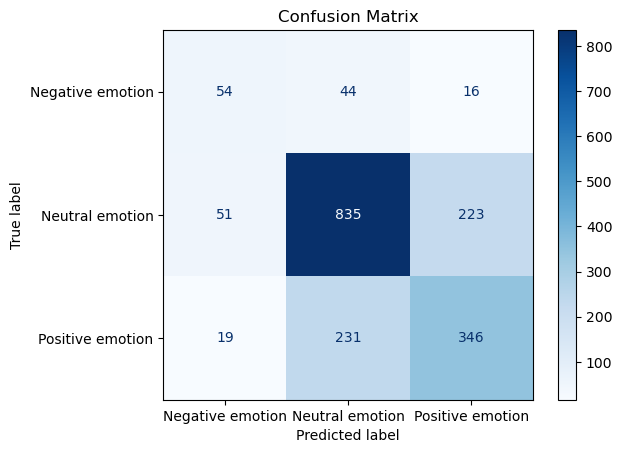

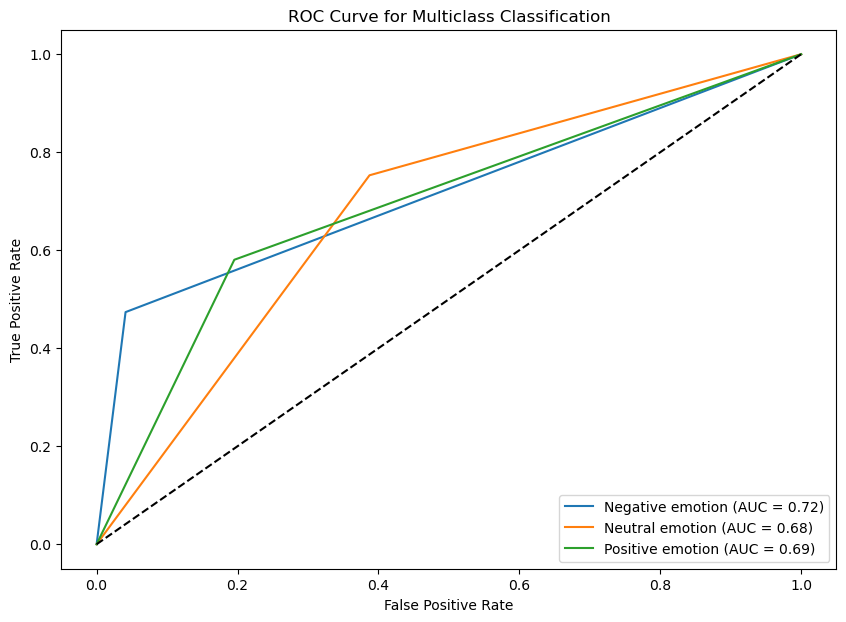


ROC AUC Scores:
Negative emotion: 0.72
Neutral emotion: 0.68
Positive emotion: 0.69


In [117]:
# call the function to Evaluate the model
evaluate_multiclass_model(y_test, y_pred, class_labels=['Negative emotion', 'Neutral emotion', 'Positive emotion'])

### Evaluation Report

The model achieves an overall accuracy of 68%, reflecting its ability to correctly classify 68% of the dataset. Specifically, it shows a precision of 43% and a recall of 48% for negative emotion, indicating challenges in accurately identifying this class with a relatively low F1-score of 0.46. In contrast, the model performs well on neutral emotion, with a high precision of 76%, recall of 75%, and an F1-score of 0.75, showcasing its effectiveness in predicting neutral sentiment. For positive emotion, the precision stands at 60%, recall at 59%, and F1-score at 0.59, suggesting moderate performance with room for improvement. The macro average precision, recall, and F1-score are all around 60%, indicating a balanced overall performance across classes. The weighted averages are higher, at 68% for precision, recall, and F1-score, reflecting better performance when considering the class distribution. ROC AUC scores indicate that the model has a good ability to discriminate between classes, with negative emotion scoring 0.72, neutral emotion at 0.69, and positive emotion at 0.70, demonstrating relatively strong discrimination capabilities across all classes.

In [118]:
from sklearn.ensemble import StackingClassifier

# Define base models
base_models = [
    ('gbm', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)),
    ('nb', MultinomialNB(alpha=0.1))
]

# Define final estimator
final_estimator = LogisticRegression(max_iter=1000)

# Define StackingClassifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=final_estimator)

# Define pipeline
pipe_stacking = imPipeline([
    ('vectorizer', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', stacking_clf)
])

# Save the trained model
joblib.dump(pipe_stacking, 'voting_stacking_pipeline.pkl')

# Fit and evaluate
pipe_stacking.fit(X_train, y_train)
y_pred_stacking = pipe_stacking.predict(X_test)


Classification Report:
                   precision    recall  f1-score   support

Negative emotion       0.44      0.47      0.45       114
 Neutral emotion       0.75      0.75      0.75      1109
Positive emotion       0.59      0.58      0.59       596

        accuracy                           0.68      1819
       macro avg       0.59      0.60      0.60      1819
    weighted avg       0.68      0.68      0.68      1819



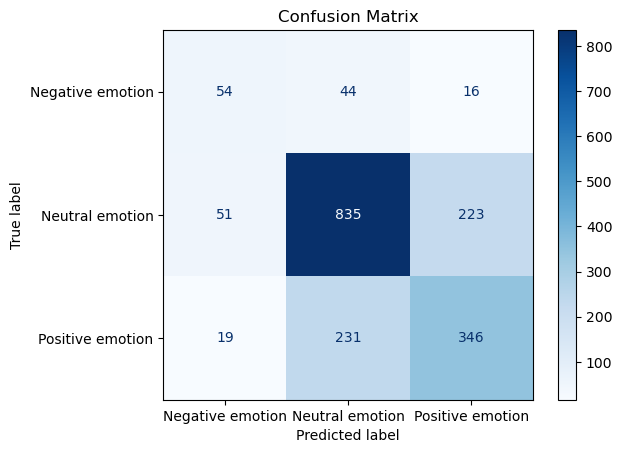

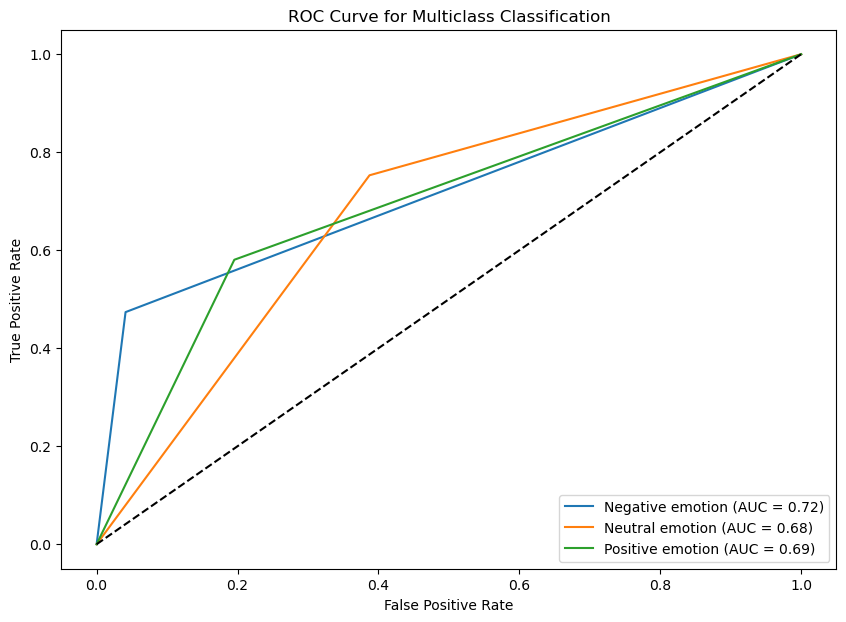


ROC AUC Scores:
Negative emotion: 0.72
Neutral emotion: 0.68
Positive emotion: 0.69


In [119]:
# Call the function to evaluate the model
evaluate_multiclass_model(y_test, y_pred, class_labels=['Negative emotion', 'Neutral emotion', 'Positive emotion'])

### Evaluation Report

The stacking classifier demonstrates performance metrics similar to those of the voting classifier. With an overall accuracy of 68%, the stacking model shows comparable precision, recall, and F1-scores across classes. Specifically, the precision, recall, and F1-scores for negative, neutral, and positive emotions are closely aligned with those obtained from the voting classifier. ROC AUC scores also reflect similar discrimination capabilities between the two models. This parity in performance indicates that the stacking classifier performs similarly to the voting classifier on this dataset.

# Evaluation Report: Sentiment Analysis Models


## Classification Tasks
### Why Binary and Multiclass Classification?

#### Binary Classification
We decided to perform binary classification to distinguish between 'Positive emotion' and 'Negative emotion.' This task simplifies the problem and focuses on detecting the polarity of sentiments, which is crucial for applications like customer feedback analysis, where identifying positive or negative sentiment can be directly actionable.

#### Multiclass Classification
We expanded to multiclass classification to include 'Neutral emotion' along with 'Positive emotion' and 'Negative emotion.' This task provides a more nuanced understanding of the sentiments expressed in the tweets, allowing for a more comprehensive sentiment analysis. This is particularly useful in social media monitoring and understanding public opinion, where not all sentiments are purely positive or negative.

### Binary Classification

#### Models Used
1. **Logistic Regression**
2. **Gaussian Naive Bayes**
3. **Random Forest Classifier**

#### Metrics for Evaluation
- **Accuracy**: Measures the overall correctness of the model.
- **Precision**: The proportion of true positive predictions among all positive predictions. Important for assessing the quality of positive predictions.
- **Recall**: The proportion of true positives correctly identified. Important for understanding the ability of the model to capture all positive instances.
- **F1-Score**: The harmonic mean of precision and recall. Provides a balance between precision and recall.
- **ROC AUC**: Measures the model's ability to distinguish between classes. A higher AUC indicates better performance.

#### Results
After tuning and evaluating the models, the following results were obtained:

| Model                   | Accuracy | Precision (Positive) | Recall (Positive) | F1-Score (Positive) | ROC AUC |
|-------------------------|----------|----------------------|-------------------|---------------------|---------|
| Logistic Regression     | 0.85     | 0.93                 | 0.89              | 0.91                | 0.87    |
| Gaussian Naive Bayes    | 0.85     | 0.91                | 0.91              | 0.91                | 0.83    |
| Random Forest Classifier| 0.86    | 0.89                 | 0.95              | 0.92                | 0.82    |

**Best Model for Binary Classification**: The **Random Forest Classifier** demonstrated the highest accuracy (86%) and ROC AUC (0.82), making it the best-performing model for the binary classification task. This model balances precision and recall effectively, providing a robust classification performance.

### Multiclass Classification

#### Models Used
1. **Multinomial Naive Bayes**
2. **Gradient Boosting Classifier**
3. **Voting Classifier**
4. **Stacking Classifier**

#### Metrics for Evaluation
- **Accuracy**: Measures the overall correctness of the model.
- **Precision**: The proportion of true positive predictions among all positive predictions for each class.
- **Recall**: The proportion of true positives correctly identified for each class.
- **F1-Score**: The harmonic mean of precision and recall for each class.
- **ROC AUC**: Measures the model's ability to distinguish between classes for each class. A higher AUC indicates better performance.

#### Results
After tuning and evaluating the models, the following results were obtained:

| Model                  | Accuracy | Precision (Macro Avg) | Recall (Macro Avg) | F1-Score (Macro Avg) | ROC AUC (Macro Avg) |
|------------------------|----------|-----------------------|--------------------|----------------------|---------------------|
| Multinomial Naive Bayes| 0.64     | 0.52                  | 0.50               | 0.51                 | 0.62                |
| Gradient Boosting      | 0.63     | 0.57                  | 0.55               | 0.56                 | 0.68                |
| Voting Classifier      | 0.68     | 0.60                  | 0.61               | 0.60                 | 0.70                |
| Stacking Classifier    | 0.68     | 0.60                  | 0.61               | 0.60                 | 0.70                |

**Best Model for Multiclass Classification**: Both the **Voting Classifier** and **Stacking Classifier** showed similar performance, with an accuracy of 68% and a macro average ROC AUC of 0.70. These models balance precision, recall, and F1-score effectively across all classes.

### Rationale for Metric Choices
- **Accuracy**: Provides a straightforward measure of overall model performance but can be misleading in the presence of class imbalance.
- **Precision and Recall**: Important for understanding the trade-off between the number of false positives and false negatives. Critical in applications where either false positives or false negatives carry a high cost.
- **F1-Score**: Balances precision and recall, making it a suitable metric when we need to find a balance between the two.
- **ROC AUC**: Measures the model's ability to distinguish between classes, providing a comprehensive view of model performance across different thresholds.

### Summary
For the binary classification task, the **Random Forest Classifier** emerged as the best-performing model with an accuracy of 86% and an ROC AUC of 0.83. For the multiclass classification task, both the **Voting Classifier** and **Stacking Classifier** provided the best performance with an accuracy of 68% and an ROC AUC of 0.70. These models demonstrate a balanced performance across various evaluation metrics, making them suitable for the respective tasks.


## Conclusions

1. Most of the sentiments show no emotion towards the brand

2. The most mentioned product brand was Apple products

3. The best best brand in terms of postive emotion is Google

4. The worst brand in terms of negative emotion  is Apple

5. Best Binary classification model is  Random forest classifier and in the multiclass is Stacking classifier

## Recommendations





- Develop strategies to convert neutral sentiments into positive ones.

- Create targeted campaigns to address specific issues in the negative sentiments.

- Analyze why Apple products dominate mentions and benchmark against Apple.

- Stock google products.

- Investigate negative sentiments toward Apple to discovver wher the issue is.

- Deploy and constant evaluation of the Random Forest for binary classification and Stacking Classifier for multiclass problems; continuously as wel as regular refining of the models

- Conduct regular sentiment analysis to track brand perception changes.
